# Improvement

According to the latest analysis, I have gained a trading idea regarding the percentage change of ATO and ATC prices. This version will be improved by adding more data tests and backtesting to evaluate its performance.

In [1]:
# load data 

import pandas as pd
from datetime import datetime

atoatc = pd.read_csv('stocksm_atoatcs_202304061818.csv')
delta = pd.read_csv('SET_DLY_DELTA, 1D.csv')
advanc = pd.read_csv('SET_DLY_ADVANC, 1D.csv')
aot = pd.read_csv('SET_DLY_AOT, 1D.csv')
ptt = pd.read_csv('SET_DLY_PTT, 1D.csv')
pttep = pd.read_csv('SET_DLY_PTTEP, 1D.csv')

print(atoatc.shape)
print(delta.shape)
print(aot.shape)
print(advanc.shape)
print(ptt.shape)
print(pttep.shape)

(1939, 18)
(389, 7)
(392, 7)
(392, 7)
(392, 7)
(392, 7)


In [3]:
atoatc.head(5)

,_id,Symbol,VolATO1,PriceATO1,Close(T_1),VolATO2,PriceATO2,Price12_30,VolATC,PriceATC,Price16_30,PercentChgSS1,ValueSS1,PercentChgSS2,ValueSS2,PercentChgATC,ValueATC,updated_at
0,1,ADVANC,0,0.0,0.0,0,0.0,0.0,2192000,188.00,188.50,0.0,0,0.0,0,-0.27,412096000,2021-08-31
1,17,AOT,0,0.0,0.0,0,0.0,0.0,6842500,63.75,63.75,0.0,0,0.0,0,0.00,436209375,2021-08-31
2,121,DELTA,0,0.0,0.0,0,0.0,0.0,441000,584.00,584.00,0.0,0,0.0,0,0.00,257544000,2021-08-31
3,252,PTTEP,0,0.0,0.0,0,0.0,0.0,3087900,111.50,112.00,0.0,0,0.0,0,-0.45,344300850,2021-08-31
4,256,PTT,0,0.0,0.0,0,0.0,0.0,26412200,38.25,38.50,0.0,0,0.0,0,-0.65,1010266650,2021-08-31


In [4]:
atoatc.isna().sum()

_id              0
Symbol           0
VolATO1          0
PriceATO1        0
Close(T_1)       0
VolATO2          0
PriceATO2        0
Price12_30       0
VolATC           0
PriceATC         0
Price16_30       0
PercentChgSS1    0
ValueSS1         0
PercentChgSS2    0
ValueSS2         0
PercentChgATC    0
ValueATC         0
updated_at       0
dtype: int64

In [5]:
delta.head(5)

,time,open,high,low,close,Volume,Volume MA
0,2021-08-27T09:00:00+07:00,564,576,562,566,816900,890700.0
1,2021-08-30T09:00:00+07:00,562,576,556,570,1449600,982080.0
2,2021-08-31T09:00:00+07:00,564,590,564,584,2035600,1253840.0
3,2021-09-01T09:00:00+07:00,594,660,590,656,6737100,2377780.0
4,2021-09-02T09:00:00+07:00,660,736,654,726,8388300,3885500.0


In [6]:
aot.head(5)

,time,open,high,low,close,Volume,Volume MA
0,2021-08-27T09:00:00+07:00,62.50,63.25,61.75,62.75,19207300,24982100.0
1,2021-08-30T09:00:00+07:00,63.00,64.00,62.75,63.75,39591400,24528900.0
2,2021-08-31T09:00:00+07:00,63.75,63.75,63.25,63.75,27142200,25135260.0
3,2021-09-01T09:00:00+07:00,63.75,63.75,62.25,62.50,33520800,28354680.0
4,2021-09-02T09:00:00+07:00,62.00,63.25,61.50,62.75,25815900,29055520.0


In [7]:
ptt.head(5)

,time,open,high,low,close,Volume,Volume MA
0,2021-08-27T09:00:00+07:00,37.25,37.75,37.00,37.75,66171000,85970880.0
1,2021-08-30T09:00:00+07:00,38.00,38.75,38.00,38.75,97994200,88060600.0
2,2021-08-31T09:00:00+07:00,38.50,38.75,38.00,38.25,98277700,79303180.0
3,2021-09-01T09:00:00+07:00,38.25,38.50,37.50,37.50,83087800,78151360.0
4,2021-09-02T09:00:00+07:00,37.50,38.25,37.25,38.00,53803000,79866740.0


In [8]:
pttep.head(5)

,time,open,high,low,close,Volume,Volume MA
0,2021-08-27T09:00:00+07:00,107.5,109.0,106.5,108.5,5632800,10851780.0
1,2021-08-30T09:00:00+07:00,110.5,114.0,110.0,113.5,18303000,12115100.0
2,2021-08-31T09:00:00+07:00,112.5,113.0,111.0,111.5,9230500,8571800.0
3,2021-09-01T09:00:00+07:00,112.0,112.0,109.5,109.5,9287800,9173180.0
4,2021-09-02T09:00:00+07:00,109.5,110.5,109.0,110.0,3780200,9246860.0


In [9]:
advanc.head(5)

,time,open,high,low,close,Volume,Volume MA
0,2021-08-27T09:00:00+07:00,183.5,185.5,183.0,184.5,9635000,8363740.0
1,2021-08-30T09:00:00+07:00,185.5,186.5,183.5,184.0,8232500,7970800.0
2,2021-08-31T09:00:00+07:00,183.5,189.5,183.5,188.0,17957000,10470820.0
3,2021-09-01T09:00:00+07:00,188.5,189.5,186.0,186.0,9287500,10903800.0
4,2021-09-02T09:00:00+07:00,187.0,190.5,186.5,188.5,16097500,12241900.0


# Date time arrangement

In [11]:
# Set to date format of ATO/ATC data

atoatc['Date'] = pd.to_datetime(atoatc['updated_at']).dt.date
atoatc = atoatc.drop('updated_at',axis=1)
atoatc['Date'] = pd.to_datetime(atoatc['Date'])
atoatc.head(5)

,_id,Symbol,VolATO1,PriceATO1,Close(T_1),VolATO2,PriceATO2,Price12_30,VolATC,PriceATC,Price16_30,PercentChgSS1,ValueSS1,PercentChgSS2,ValueSS2,PercentChgATC,ValueATC,Date
0,1,ADVANC,0,0.0,0.0,0,0.0,0.0,2192000,188.00,188.50,0.0,0,0.0,0,-0.27,412096000,2021-08-31
1,17,AOT,0,0.0,0.0,0,0.0,0.0,6842500,63.75,63.75,0.0,0,0.0,0,0.00,436209375,2021-08-31
2,121,DELTA,0,0.0,0.0,0,0.0,0.0,441000,584.00,584.00,0.0,0,0.0,0,0.00,257544000,2021-08-31
3,252,PTTEP,0,0.0,0.0,0,0.0,0.0,3087900,111.50,112.00,0.0,0,0.0,0,-0.45,344300850,2021-08-31
4,256,PTT,0,0.0,0.0,0,0.0,0.0,26412200,38.25,38.50,0.0,0,0.0,0,-0.65,1010266650,2021-08-31


In [12]:
# DELTA date time

# Convert the 'time' column to datetime format
delta['time'] = pd.to_datetime(delta['time'])

# Extract only the date from the 'time' column
delta['Date'] = delta['time'].dt.date
delta['Date'] = pd.to_datetime(delta['Date'])

# Drop the 'time' column
delta = delta.drop('time', axis=1)

# add Symbol column
delta['Symbol'] = 'DELTA'


delta.head(5)

,open,high,low,close,Volume,Volume MA,Date,Symbol
0,564,576,562,566,816900,890700.0,2021-08-27,DELTA
1,562,576,556,570,1449600,982080.0,2021-08-30,DELTA
2,564,590,564,584,2035600,1253840.0,2021-08-31,DELTA
3,594,660,590,656,6737100,2377780.0,2021-09-01,DELTA
4,660,736,654,726,8388300,3885500.0,2021-09-02,DELTA


In [13]:
# AOT date time

# Convert the 'time' column to datetime format
aot['time'] = pd.to_datetime(aot['time'])

# Extract only the date from the 'time' column
aot['Date'] = aot['time'].dt.date
aot['Date'] = pd.to_datetime(aot['Date'])

# Drop the 'time' column
aot = aot.drop('time', axis=1)

# add Symbol column
aot['Symbol'] = 'AOT'


aot.head(5)

,open,high,low,close,Volume,Volume MA,Date,Symbol
0,62.50,63.25,61.75,62.75,19207300,24982100.0,2021-08-27,AOT
1,63.00,64.00,62.75,63.75,39591400,24528900.0,2021-08-30,AOT
2,63.75,63.75,63.25,63.75,27142200,25135260.0,2021-08-31,AOT
3,63.75,63.75,62.25,62.50,33520800,28354680.0,2021-09-01,AOT
4,62.00,63.25,61.50,62.75,25815900,29055520.0,2021-09-02,AOT


In [14]:
# ADVANC date time

# Convert the 'time' column to datetime format
advanc['time'] = pd.to_datetime(advanc['time'])

# Extract only the date from the 'time' column
advanc['Date'] = advanc['time'].dt.date
advanc['Date'] = pd.to_datetime(advanc['Date'])

# Drop the 'time' column
advanc = advanc.drop('time', axis=1)

# add Symbol column
advanc['Symbol'] = 'ADVANC'


advanc.head(5)

,open,high,low,close,Volume,Volume MA,Date,Symbol
0,183.5,185.5,183.0,184.5,9635000,8363740.0,2021-08-27,ADVANC
1,185.5,186.5,183.5,184.0,8232500,7970800.0,2021-08-30,ADVANC
2,183.5,189.5,183.5,188.0,17957000,10470820.0,2021-08-31,ADVANC
3,188.5,189.5,186.0,186.0,9287500,10903800.0,2021-09-01,ADVANC
4,187.0,190.5,186.5,188.5,16097500,12241900.0,2021-09-02,ADVANC


In [15]:
# PTT date time

# Convert the 'time' column to datetime format
ptt['time'] = pd.to_datetime(ptt['time'])

# Extract only the date from the 'time' column
ptt['Date'] = ptt['time'].dt.date
ptt['Date'] = pd.to_datetime(ptt['Date'])

# Drop the 'time' column
ptt = ptt.drop('time', axis=1)

# add Symbol column
ptt['Symbol'] = 'PTT'


ptt.head(5)

,open,high,low,close,Volume,Volume MA,Date,Symbol
0,37.25,37.75,37.00,37.75,66171000,85970880.0,2021-08-27,PTT
1,38.00,38.75,38.00,38.75,97994200,88060600.0,2021-08-30,PTT
2,38.50,38.75,38.00,38.25,98277700,79303180.0,2021-08-31,PTT
3,38.25,38.50,37.50,37.50,83087800,78151360.0,2021-09-01,PTT
4,37.50,38.25,37.25,38.00,53803000,79866740.0,2021-09-02,PTT


In [16]:
# PTTEP date time

# Convert the 'time' column to datetime format
pttep['time'] = pd.to_datetime(pttep['time'])

# Extract only the date from the 'time' column
pttep['Date'] = pttep['time'].dt.date
pttep['Date'] = pd.to_datetime(pttep['Date'])

# Drop the 'time' column
pttep = pttep.drop('time', axis=1)

# add Symbol column
pttep['Symbol'] = 'PTTEP'


pttep.head(5)

,open,high,low,close,Volume,Volume MA,Date,Symbol
0,107.5,109.0,106.5,108.5,5632800,10851780.0,2021-08-27,PTTEP
1,110.5,114.0,110.0,113.5,18303000,12115100.0,2021-08-30,PTTEP
2,112.5,113.0,111.0,111.5,9230500,8571800.0,2021-08-31,PTTEP
3,112.0,112.0,109.5,109.5,9287800,9173180.0,2021-09-01,PTTEP
4,109.5,110.5,109.0,110.0,3780200,9246860.0,2021-09-02,PTTEP


# Merge table

In [17]:
delta_m = pd.merge(delta, atoatc, on=['Date', 'Symbol'],how='left')
aot_m = pd.merge(aot, atoatc, on=['Date', 'Symbol'],how='left')
ptt_m = pd.merge(ptt, atoatc, on=['Date', 'Symbol'],how='left')
pttep_m = pd.merge(pttep, atoatc, on=['Date', 'Symbol'],how='left')
advanc_m = pd.merge(advanc, atoatc, on=['Date', 'Symbol'],how='left')

print(delta_m.shape)
print(aot_m.shape)
print(advanc_m.shape)
print(ptt_m.shape)
print(pttep_m.shape)

(404, 24)
(407, 24)
(407, 24)
(408, 24)
(408, 24)


### Create Percent Change column

In [18]:
# today_close and tomorrow_open

delta_m['chg_Ct_Ot1'] = round((delta_m['open'].shift(-1)-delta_m['close'])/delta_m['close'],4)
aot_m['chg_Ct_Ot1'] = round((aot_m['open'].shift(-1)-aot_m['close'])/aot_m['close'],4)
advanc_m['chg_Ct_Ot1'] = round((advanc_m['open'].shift(-1)-advanc_m['close'])/advanc_m['close'],4)
ptt_m['chg_Ct_Ot1'] = round((ptt_m['open'].shift(-1)-ptt_m['close'])/ptt_m['close'],4)
pttep_m['chg_Ct_Ot1'] = round((pttep_m['open'].shift(-1)-pttep_m['close'])/pttep_m['close'],4)

print(delta_m['chg_Ct_Ot1'].head())
print(aot_m['chg_Ct_Ot1'].head())
print(advanc_m['chg_Ct_Ot1'].head())
print(ptt_m['chg_Ct_Ot1'].head())
print(pttep_m['chg_Ct_Ot1'].head())

0   -0.0071
1   -0.0105
2    0.0171
3    0.0061
4    0.0275
Name: chg_Ct_Ot1, dtype: float64
0    0.004
1    0.000
2    0.000
3   -0.008
4    0.004
Name: chg_Ct_Ot1, dtype: float64
0    0.0054
1   -0.0027
2    0.0027
3    0.0054
4    0.0027
Name: chg_Ct_Ot1, dtype: float64
0    0.0066
1   -0.0065
2    0.0000
3    0.0000
4    0.0066
Name: chg_Ct_Ot1, dtype: float64
0    0.0184
1   -0.0088
2    0.0045
3    0.0000
4    0.0045
Name: chg_Ct_Ot1, dtype: float64


In [19]:
# Open jump (Today open compare with yesterday close)

delta_m['today_jump'] = delta_m['chg_Ct_Ot1'].shift(1)
aot_m['today_jump'] = aot_m['chg_Ct_Ot1'].shift(1)
advanc_m['today_jump'] = advanc_m['chg_Ct_Ot1'].shift(1)
ptt_m['today_jump'] = ptt_m['chg_Ct_Ot1'].shift(1)
pttep_m['today_jump'] = pttep_m['chg_Ct_Ot1'].shift(1)

print(delta_m['today_jump'].head())
print(aot_m['today_jump'].head())
print(advanc_m['today_jump'].head())
print(ptt_m['today_jump'].head())
print(pttep_m['today_jump'].head())

0       NaN
1   -0.0071
2   -0.0105
3    0.0171
4    0.0061
Name: today_jump, dtype: float64
0      NaN
1    0.004
2    0.000
3    0.000
4   -0.008
Name: today_jump, dtype: float64
0       NaN
1    0.0054
2   -0.0027
3    0.0027
4    0.0054
Name: today_jump, dtype: float64
0       NaN
1    0.0066
2   -0.0065
3    0.0000
4    0.0000
Name: today_jump, dtype: float64
0       NaN
1    0.0184
2   -0.0088
3    0.0045
4    0.0000
Name: today_jump, dtype: float64


In [20]:
# today_close and today_open

delta_m['chg_Ct_Ot'] = round((delta_m['close']-delta_m['open'])/delta_m['open'],4)
aot_m['chg_Ct_Ot'] = round((aot_m['close']-aot_m['open'])/aot_m['open'],4)
advanc_m['chg_Ct_Ot'] = round((advanc_m['close']-advanc_m['open'])/advanc_m['open'],4)
ptt_m['chg_Ct_Ot'] = round((ptt_m['close']-ptt_m['open'])/ptt_m['open'],4)
pttep_m['chg_Ct_Ot'] = round((pttep_m['close']-pttep_m['open'])/pttep_m['open'],4)

print(delta_m['chg_Ct_Ot'].head())
print(aot_m['chg_Ct_Ot'].head())
print(advanc_m['chg_Ct_Ot'].head())
print(ptt_m['chg_Ct_Ot'].head())
print(pttep_m['chg_Ct_Ot'].head())

0    0.0035
1    0.0142
2    0.0355
3    0.1044
4    0.1000
Name: chg_Ct_Ot, dtype: float64
0    0.0040
1    0.0119
2    0.0000
3   -0.0196
4    0.0121
Name: chg_Ct_Ot, dtype: float64
0    0.0054
1   -0.0081
2    0.0245
3   -0.0133
4    0.0080
Name: chg_Ct_Ot, dtype: float64
0    0.0134
1    0.0197
2   -0.0065
3   -0.0196
4    0.0133
Name: chg_Ct_Ot, dtype: float64
0    0.0093
1    0.0271
2   -0.0089
3   -0.0223
4    0.0046
Name: chg_Ct_Ot, dtype: float64


In [21]:
# today_close and tomorrow_close

delta_m['chg_Ct_Ct1'] = round((delta_m['close'].shift(-1)-delta_m['close'])/delta_m['close'],4)
aot_m['chg_Ct_Ct1'] = round((aot_m['close'].shift(-1)-aot_m['close'])/aot_m['close'],4)
advanc_m['chg_Ct_Ct1'] = round((advanc_m['close'].shift(-1)-advanc_m['close'])/advanc_m['close'],4)
ptt_m['chg_Ct_Ct1'] = round((ptt_m['close'].shift(-1)-ptt_m['close'])/ptt_m['close'],4)
pttep_m['chg_Ct_Ct1'] = round((pttep_m['close'].shift(-1)-pttep_m['close'])/pttep_m['close'],4)

print(delta_m['chg_Ct_Ct1'].head())
print(aot_m['chg_Ct_Ct1'].head())
print(advanc_m['chg_Ct_Ct1'].head())
print(ptt_m['chg_Ct_Ct1'].head())
print(pttep_m['chg_Ct_Ct1'].head())

0    0.0071
1    0.0246
2    0.1233
3    0.1067
4    0.0055
Name: chg_Ct_Ct1, dtype: float64
0    0.0159
1    0.0000
2   -0.0196
3    0.0040
4    0.0120
Name: chg_Ct_Ct1, dtype: float64
0   -0.0027
1    0.0217
2   -0.0106
3    0.0134
4    0.0080
Name: chg_Ct_Ct1, dtype: float64
0    0.0265
1   -0.0129
2   -0.0196
3    0.0133
4    0.0066
Name: chg_Ct_Ct1, dtype: float64
0    0.0461
1   -0.0176
2   -0.0179
3    0.0046
4    0.0000
Name: chg_Ct_Ct1, dtype: float64


In [22]:
# compare today volumn with average 5 day volumn

delta_m['comp5ma'] =  round((delta_m['Volume']/delta_m['Volume MA']),4)
aot_m['comp5ma'] =  round((aot_m['Volume']/aot_m['Volume MA']),4)
advanc_m['comp5ma'] =  round((advanc_m['Volume']/advanc_m['Volume MA']),4)
ptt_m['comp5ma'] =  round((ptt_m['Volume']/ptt_m['Volume MA']),4)
pttep_m['comp5ma'] =  round((pttep_m['Volume']/pttep_m['Volume MA']),4)

print(delta_m['comp5ma'].head())
print(aot_m['comp5ma'].head())
print(advanc_m['comp5ma'].head())
print(ptt_m['comp5ma'].head())
print(pttep_m['comp5ma'].head())

0    0.9171
1    1.4761
2    1.6235
3    2.8334
4    2.1589
Name: comp5ma, dtype: float64
0    0.7688
1    1.6141
2    1.0798
3    1.1822
4    0.8885
Name: comp5ma, dtype: float64
0    1.1520
1    1.0328
2    1.7150
3    0.8518
4    1.3150
Name: comp5ma, dtype: float64
0    0.7697
1    1.1128
2    1.2393
3    1.0632
4    0.6737
Name: comp5ma, dtype: float64
0    0.5191
1    1.5108
2    1.0768
3    1.0125
4    0.4088
Name: comp5ma, dtype: float64


In [23]:
# Previuos compare today volumn with average 5 day volumn

delta_m['PreComp5ma'] =  delta_m['comp5ma'].shift(1)
aot_m['PreComp5ma'] =  aot_m['comp5ma'].shift(1)
advanc_m['PreComp5ma'] =  advanc_m['comp5ma'].shift(1)
ptt_m['PreComp5ma'] =  ptt_m['comp5ma'].shift(1)
pttep_m['PreComp5ma'] =  pttep_m['comp5ma'].shift(1)

print(delta_m['PreComp5ma'].head())
print(aot_m['PreComp5ma'].head())
print(advanc_m['PreComp5ma'].head())
print(ptt_m['PreComp5ma'].head())
print(pttep_m['PreComp5ma'].head())

0       NaN
1    0.9171
2    1.4761
3    1.6235
4    2.8334
Name: PreComp5ma, dtype: float64
0       NaN
1    0.7688
2    1.6141
3    1.0798
4    1.1822
Name: PreComp5ma, dtype: float64
0       NaN
1    1.1520
2    1.0328
3    1.7150
4    0.8518
Name: PreComp5ma, dtype: float64
0       NaN
1    0.7697
2    1.1128
3    1.2393
4    1.0632
Name: PreComp5ma, dtype: float64
0       NaN
1    0.5191
2    1.5108
3    1.0768
4    1.0125
Name: PreComp5ma, dtype: float64


In [24]:
# percent of daily swing (high - low)/low

delta_m['swing'] = round(((delta_m['high']-delta_m['low'])/delta_m['low']),4)
aot_m['swing'] = round(((aot_m['high']-aot_m['low'])/aot_m['low']),4)
advanc_m['swing'] = round(((advanc_m['high']-advanc_m['low'])/advanc_m['low']),4)
ptt_m['swing'] = round(((ptt_m['high']-ptt_m['low'])/ptt_m['low']),4)
pttep_m['swing'] = round(((pttep_m['high']-pttep_m['low'])/pttep_m['low']),4)

print(delta_m['swing'].head())
print(aot_m['swing'].head())
print(advanc_m['swing'].head())
print(ptt_m['swing'].head())
print(pttep_m['swing'].head())

0    0.0249
1    0.0360
2    0.0461
3    0.1186
4    0.1254
Name: swing, dtype: float64
0    0.0243
1    0.0199
2    0.0079
3    0.0241
4    0.0285
Name: swing, dtype: float64
0    0.0137
1    0.0163
2    0.0327
3    0.0188
4    0.0214
Name: swing, dtype: float64
0    0.0203
1    0.0197
2    0.0197
3    0.0267
4    0.0268
Name: swing, dtype: float64
0    0.0235
1    0.0364
2    0.0180
3    0.0228
4    0.0138
Name: swing, dtype: float64


In [25]:
# percent change of Price ATO2 to Price ATO1

delta_m['P_chg_ATO2_ATO1'] = round(((delta_m['PriceATO2']-delta_m['PriceATO1'])/delta_m['PriceATO1']),4)
aot_m['P_chg_ATO2_ATO1'] = round(((aot_m['PriceATO2']-aot_m['PriceATO1'])/aot_m['PriceATO1']),4)
advanc_m['P_chg_ATO2_ATO1'] = round(((advanc_m['PriceATO2']-advanc_m['PriceATO1'])/advanc_m['PriceATO1']),4)
ptt_m['P_chg_ATO2_ATO1'] = round(((ptt_m['PriceATO2']-ptt_m['PriceATO1'])/ptt_m['PriceATO1']),4)
pttep_m['P_chg_ATO2_ATO1'] = round(((pttep_m['PriceATO2']-pttep_m['PriceATO1'])/pttep_m['PriceATO1']),4)

print(delta_m['P_chg_ATO2_ATO1'].head())
print(aot_m['P_chg_ATO2_ATO1'].head())
print(advanc_m['P_chg_ATO2_ATO1'].head())
print(ptt_m['P_chg_ATO2_ATO1'].head())
print(pttep_m['P_chg_ATO2_ATO1'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: P_chg_ATO2_ATO1, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: P_chg_ATO2_ATO1, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: P_chg_ATO2_ATO1, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: P_chg_ATO2_ATO1, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: P_chg_ATO2_ATO1, dtype: float64


In [26]:
# percent change of Price ATC to Price ATO2

delta_m['P_chg_ATC_ATO2'] = round(((delta_m['PriceATC']-delta_m['PriceATO2'])/delta_m['PriceATO2']),4)
aot_m['P_chg_ATC_ATO2'] = round(((aot_m['PriceATC']-aot_m['PriceATO2'])/aot_m['PriceATO2']),4)
advanc_m['P_chg_ATC_ATO2'] = round(((advanc_m['PriceATC']-advanc_m['PriceATO2'])/advanc_m['PriceATO2']),4)
ptt_m['P_chg_ATC_ATO2'] = round(((ptt_m['PriceATC']-ptt_m['PriceATO2'])/ptt_m['PriceATO2']),4)
pttep_m['P_chg_ATC_ATO2'] = round(((pttep_m['PriceATC']-pttep_m['PriceATO2'])/pttep_m['PriceATO2']),4)

print(delta_m['P_chg_ATC_ATO2'].head())
print(aot_m['P_chg_ATC_ATO2'].head())
print(advanc_m['P_chg_ATC_ATO2'].head())
print(ptt_m['P_chg_ATC_ATO2'].head())
print(pttep_m['P_chg_ATC_ATO2'].head())

0    NaN
1    NaN
2    inf
3    NaN
4    NaN
Name: P_chg_ATC_ATO2, dtype: float64
0    NaN
1    NaN
2    inf
3    NaN
4    NaN
Name: P_chg_ATC_ATO2, dtype: float64
0    NaN
1    NaN
2    inf
3    NaN
4    NaN
Name: P_chg_ATC_ATO2, dtype: float64
0    NaN
1    NaN
2    inf
3    NaN
4    NaN
Name: P_chg_ATC_ATO2, dtype: float64
0    NaN
1    NaN
2    inf
3    NaN
4    NaN
Name: P_chg_ATC_ATO2, dtype: float64


In [27]:
# ratio of Volumn ATO afternoon to Volumn ATO morning

delta_m['rt_VolATO2_VolATO1'] = round((delta_m['VolATO2']/delta_m['VolATO1']),4)
aot_m['rt_VolATO2_VolATO1'] = round((aot_m['VolATO2']/aot_m['VolATO1']),4)
advanc_m['rt_VolATO2_VolATO1'] = round((advanc_m['VolATO2']/advanc_m['VolATO1']),4)
ptt_m['rt_VolATO2_VolATO1'] = round((ptt_m['VolATO2']/ptt_m['VolATO1']),4)
pttep_m['rt_VolATO2_VolATO1'] = round((pttep_m['VolATO2']/pttep_m['VolATO1']),4)

print(delta_m['rt_VolATO2_VolATO1'].head())
print(aot_m['rt_VolATO2_VolATO1'].head())
print(advanc_m['rt_VolATO2_VolATO1'].head())
print(ptt_m['rt_VolATO2_VolATO1'].head())
print(pttep_m['rt_VolATO2_VolATO1'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rt_VolATO2_VolATO1, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rt_VolATO2_VolATO1, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rt_VolATO2_VolATO1, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rt_VolATO2_VolATO1, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rt_VolATO2_VolATO1, dtype: float64


In [28]:
# ratio of Volumn ATO morning and previous day volumn

delta_m['rt_VolATO1_PreVol'] = round((delta_m['VolATO1']/delta_m['Volume'].shift(1)),4)
aot_m['rt_VolATO1_PreVol'] = round((aot_m['VolATO1']/aot_m['Volume'].shift(1)),4)
advanc_m['rt_VolATO1_PreVol'] = round((advanc_m['VolATO1']/advanc_m['Volume'].shift(1)),4)
ptt_m['rt_VolATO1_PreVol'] = round((ptt_m['VolATO1']/ptt_m['Volume'].shift(1)),4)
pttep_m['rt_VolATO1_PreVol'] = round((pttep_m['VolATO1']/pttep_m['Volume'].shift(1)),4)

print(delta_m['rt_VolATO1_PreVol'].head())
print(aot_m['rt_VolATO1_PreVol'].head())
print(advanc_m['rt_VolATO1_PreVol'].head())
print(ptt_m['rt_VolATO1_PreVol'].head())
print(pttep_m['rt_VolATO1_PreVol'].head())

0    NaN
1    NaN
2    0.0
3    NaN
4    NaN
Name: rt_VolATO1_PreVol, dtype: float64
0    NaN
1    NaN
2    0.0
3    NaN
4    NaN
Name: rt_VolATO1_PreVol, dtype: float64
0    NaN
1    NaN
2    0.0
3    NaN
4    NaN
Name: rt_VolATO1_PreVol, dtype: float64
0    NaN
1    NaN
2    0.0
3    NaN
4    NaN
Name: rt_VolATO1_PreVol, dtype: float64
0    NaN
1    NaN
2    0.0
3    NaN
4    NaN
Name: rt_VolATO1_PreVol, dtype: float64


In [29]:
# ratio of Volumn ATC to Volumn ATO afternoon

delta_m['rt_VolATC_VolATO2'] = round((delta_m['VolATC']/delta_m['VolATO2']),4)
aot_m['rt_VolATC_VolATO2'] = round((aot_m['VolATC']/aot_m['VolATO2']),4)
advanc_m['rt_VolATC_VolATO2'] = round((advanc_m['VolATC']/advanc_m['VolATO2']),4)
ptt_m['rt_VolATC_VolATO2'] = round((ptt_m['VolATC']/ptt_m['VolATO2']),4)
pttep_m['rt_VolATC_VolATO2'] = round((pttep_m['VolATC']/pttep_m['VolATO2']),4)

print(delta_m['rt_VolATC_VolATO2'].head())
print(aot_m['rt_VolATC_VolATO2'].head())
print(advanc_m['rt_VolATC_VolATO2'].head())
print(ptt_m['rt_VolATC_VolATO2'].head())
print(pttep_m['rt_VolATC_VolATO2'].head())

0    NaN
1    NaN
2    inf
3    NaN
4    NaN
Name: rt_VolATC_VolATO2, dtype: float64
0    NaN
1    NaN
2    inf
3    NaN
4    NaN
Name: rt_VolATC_VolATO2, dtype: float64
0    NaN
1    NaN
2    inf
3    NaN
4    NaN
Name: rt_VolATC_VolATO2, dtype: float64
0    NaN
1    NaN
2    inf
3    NaN
4    NaN
Name: rt_VolATC_VolATO2, dtype: float64
0    NaN
1    NaN
2    inf
3    NaN
4    NaN
Name: rt_VolATC_VolATO2, dtype: float64


## Stack data set

In [30]:
stacked = pd.concat([delta_m,aot_m,advanc_m,ptt_m,pttep_m],axis=0)
stacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 407
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   open                2034 non-null   float64       
 1   high                2034 non-null   float64       
 2   low                 2034 non-null   float64       
 3   close               2034 non-null   float64       
 4   Volume              2034 non-null   int64         
 5   Volume MA           2034 non-null   float64       
 6   Date                2034 non-null   datetime64[ns]
 7   Symbol              2034 non-null   object        
 8   _id                 1939 non-null   float64       
 9   VolATO1             1939 non-null   float64       
 10  PriceATO1           1939 non-null   float64       
 11  Close(T_1)          1939 non-null   float64       
 12  VolATO2             1939 non-null   float64       
 13  PriceATO2           1939 non-null   float64      

### Prepare data

In [39]:
# drop na
import numpy as np

# replace Infinity values with NaN values
clean_stacked = stacked.replace([np.inf, -np.inf], np.nan)

# drop rows containing NaN values
clean_stacked = clean_stacked.dropna(axis=0, how='any')
clean_stacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 5 to 403
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   open                1827 non-null   float64       
 1   high                1827 non-null   float64       
 2   low                 1827 non-null   float64       
 3   close               1827 non-null   float64       
 4   Volume              1827 non-null   int64         
 5   Volume MA           1827 non-null   float64       
 6   Date                1827 non-null   datetime64[ns]
 7   Symbol              1827 non-null   object        
 8   _id                 1827 non-null   float64       
 9   VolATO1             1827 non-null   float64       
 10  PriceATO1           1827 non-null   float64       
 11  Close(T_1)          1827 non-null   float64       
 12  VolATO2             1827 non-null   float64       
 13  PriceATO2           1827 non-null   float64      

In [41]:
# drop unecessary column

clean_stacked = clean_stacked.drop(['open','high','low','close','Volume MA','Date','_id','PriceATO1','Close(T_1)','PriceATO2',
                                    'Price12_30','PriceATC','Price16_30','PercentChgSS1','ValueSS1','PercentChgSS2',
                                   'ValueSS2'],axis=1)
        
clean_stacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 5 to 403
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Volume              1827 non-null   int64  
 1   Symbol              1827 non-null   object 
 2   VolATO1             1827 non-null   float64
 3   VolATO2             1827 non-null   float64
 4   VolATC              1827 non-null   float64
 5   PercentChgATC       1827 non-null   float64
 6   ValueATC            1827 non-null   float64
 7   chg_Ct_Ot1          1827 non-null   float64
 8   today_jump          1827 non-null   float64
 9   chg_Ct_Ot           1827 non-null   float64
 10  chg_Ct_Ct1          1827 non-null   float64
 11  comp5ma             1827 non-null   float64
 12  PreComp5ma          1827 non-null   float64
 13  swing               1827 non-null   float64
 14  P_chg_ATO2_ATO1     1827 non-null   float64
 15  P_chg_ATC_ATO2      1827 non-null   float64
 16  rt_VolA

In [42]:
clean_stacked.head()

,Volume,Symbol,VolATO1,VolATO2,VolATC,PercentChgATC,ValueATC,chg_Ct_Ot1,today_jump,chg_Ct_Ot,chg_Ct_Ct1,comp5ma,PreComp5ma,swing,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,rt_VolATO2_VolATO1,rt_VolATO1_PreVol,rt_VolATC_VolATO2
5,4578400,DELTA,68500.0,15100.0,288600.0,0.55,210678000.0,0.0137,0.0275,-0.0214,0.0466,0.9872,2.1589,0.0912,-0.0027,-0.0188,0.2204,0.0082,19.1126
8,2553000,DELTA,18800.0,24400.0,500.0,0.53,382000.0,-0.0104,-0.0027,0.0378,-0.0312,0.6160,0.4331,0.0488,0.0243,0.0079,1.2979,0.0087,0.0205
9,1959800,DELTA,40200.0,6100.0,109700.0,-0.53,81616800.0,0.0242,-0.0104,-0.0211,0.0215,0.6855,0.6160,0.0430,-0.0053,-0.0159,0.1517,0.0157,17.9836
10,1560900,DELTA,38600.0,16100.0,123300.0,0.00,93708000.0,-0.0053,0.0242,-0.0026,-0.1421,0.6921,0.6855,0.0293,0.0079,-0.0104,0.4171,0.0197,7.6584
16,2686800,DELTA,69600.0,15000.0,213000.0,0.00,118428000.0,-0.0072,0.0071,-0.0246,-0.1043,0.5568,0.9726,0.0325,-0.0175,-0.0071,0.2155,0.0141,14.2000


### Parameter

- `Volume` : Today trading volumn 
- `Symbol` : Stock symbol
- `VolATO1` : Today Morning Opening volumn 
- `VolATO2` : Afternoon Opening volumn 
- `VolATC` : At the close volumn 
- `PercentChgATC` : Percent Change of ATC price from 16:30PM price 
- `ValueATC` : Value of ATC = Yes , we pretty know before closing day 
- `chg_Ct_Ot1` : Percent change between today closing price and tomorow opening price 
- `chg_Ct_Ot` : Percent change between today closing price and today opening price 
- `chg_Ct_Ct1` : Percent change between today closing price and tomorow closing price 
- `today_jump` : Percent change between today morning opening price and yesterday closing price 
- `comp5ma` : Ratio of today volumn and average 5 day volumn 
- `PreComp5ma` : Ratio of previous volumn and average 5 day volumn 
- `swing` : Percent swing of daily swing (high - low)/low 
- `rt_VolATO1_PreVol` : Ratio of today opening volmn in the morning and previos day volumn 
- `P_chg_ATO2_ATO1` : Percent change between Afternoon price from Morning price 
- `rt_VolATO2_VolATO1` : Ratio of Afternoon opening volumn and Morning opening volumn 
- `rt_VolATC_VolATO2` : Ratio of Closing volumn and Afternoon opening volumn  
- `P_chg_ATC_ATO2` : Percent change between Closing price and Afternoon opening price 

## Machine learning

### Idea : Can we make a profit with "Buy today close price then Sold tomorrow open price"

- `Volume` : Today trading volumn = Yes , we pretty know before closing day 
- `Symbol` : Stock symbol = **No, we don't**
- `VolATO1` : Today Morning Opening volumn = Yes, we can know  
- `VolATO2` : Afternoon Opening volumn = Yes, we can know
- `VolATC` : At the close volumn = Yes , we pretty know before closing day 
- `PercentChgATC` : Percent Change of ATC price from 16:30PM price = Yes , we pretty know before closing day
- `ValueATC` : Value of ATC = Yes , we pretty know before closing day 
- `chg_Ct_Ot1` : Percent change between today closing price and tomorow opening price = This is **Target**
- `chg_Ct_Ot` : Percent change between today closing price and today opening price = Yes , we pretty know before closing day
- `chg_Ct_Ct1` : Percent change between today closing price and tomorow closing price = **No, we can't**
- `today_jump` : Percent change between today morning opening price and yesterday closing price = Yes, we can know
- `comp5ma` : Ratio of today volumn and average 5 day volumn = Yes , we pretty know before closing day
- `PreComp5ma` : Ratio of previous volumn and average 5 day volumn = Yes, we can know
- `swing` : Percent swing of daily swing (high - low)/low = Yes, we can know
- `rt_VolATO1_PreVol` : Ratio of today opening volmn in the morning and previos day volumn = Yes, we can know
- `P_chg_ATO2_ATO1` : Percent change between Afternoon price from Morning price = Yes, we can know
- `rt_VolATO2_VolATO1` : Ratio of Afternoon opening volumn and Morning opening volumn = Yes, we can know
- `rt_VolATC_VolATO2` : Ratio of Closing volumn and Afternoon opening volumn  = Yes , we pretty know before closing day
- `P_chg_ATC_ATO2` : Percent change between Closing price and Afternoon opening price = Yes , we pretty know before closing day

In [43]:
# Import library

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [44]:
# X = feature variables, y = a target variable

X = clean_stacked.drop(["chg_Ct_Ot1","chg_Ct_Ct1","Symbol"], axis=1)
y = clean_stacked['chg_Ct_Ot1']

print(X.shape)
print(y.shape)

(1827, 16)
(1827,)


In [45]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1461, 16)
y_train: (1461,)
X_test:  (366, 16)
y_test:  (366,)


### Model fitting

In [46]:
# Model fitting

# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
enet_model = ElasticNet(alpha = 0.01)
enet_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.82477e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


ElasticNet(alpha=0.01)

### Model evaluation

In [47]:
# Model evaluation

# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")

# Lasso Regression
pred_lasso_test = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, pred_lasso_test, squared=False).round(4)
test_r2_lasso = lasso_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Lasso model : {rmse_lasso}")
print(f"R-squared from Lasso model : {test_r2_lasso}")

# ElasticNet Regression
pred_enet_test = enet_model.predict(X_test)
rmse_enet = mean_squared_error(y_test, pred_enet_test, squared=False).round(4)
test_r2_enet = enet_model.score(X_test, y_test).round(4)
print(f"\nRMSE from ElasticNet model : {rmse_enet}")
print(f"R-squared from ElasticNet model : {test_r2_enet}")

RMSE from Linear model : 0.0096
R-squared from Linear model : -0.0083

RMSE from Logistic model : 0.0096
R-squared from Logistic model : -0.0083

RMSE from Ridge model : 0.0096
R-squared from Ridge model : -0.0064

RMSE from Lasso model : 0.0096
R-squared from Lasso model : 0.0023

RMSE from ElasticNet model : 0.0096
R-squared from ElasticNet model : 0.0029


#### Very low R-squared it mean the model is performing slightly worse 



#### So I just want to know tomorrow opening price are up or down from today closing price. Test by classifition model

In [48]:
# Change Target pameter to 1= Up, 0 = Don't up

clean_stacked['Target_Ct_Ot1'] = np.where(clean_stacked['chg_Ct_Ot1'] > 0, 1, 0)
clean_stacked.head()

,Volume,Symbol,VolATO1,VolATO2,VolATC,PercentChgATC,ValueATC,chg_Ct_Ot1,today_jump,chg_Ct_Ot,chg_Ct_Ct1,comp5ma,PreComp5ma,swing,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,rt_VolATO2_VolATO1,rt_VolATO1_PreVol,rt_VolATC_VolATO2,Target_Ct_Ot1
5,4578400,DELTA,68500.0,15100.0,288600.0,0.55,210678000.0,0.0137,0.0275,-0.0214,0.0466,0.9872,2.1589,0.0912,-0.0027,-0.0188,0.2204,0.0082,19.1126,1
8,2553000,DELTA,18800.0,24400.0,500.0,0.53,382000.0,-0.0104,-0.0027,0.0378,-0.0312,0.6160,0.4331,0.0488,0.0243,0.0079,1.2979,0.0087,0.0205,0
9,1959800,DELTA,40200.0,6100.0,109700.0,-0.53,81616800.0,0.0242,-0.0104,-0.0211,0.0215,0.6855,0.6160,0.0430,-0.0053,-0.0159,0.1517,0.0157,17.9836,1
10,1560900,DELTA,38600.0,16100.0,123300.0,0.00,93708000.0,-0.0053,0.0242,-0.0026,-0.1421,0.6921,0.6855,0.0293,0.0079,-0.0104,0.4171,0.0197,7.6584,0
16,2686800,DELTA,69600.0,15000.0,213000.0,0.00,118428000.0,-0.0072,0.0071,-0.0246,-0.1043,0.5568,0.9726,0.0325,-0.0175,-0.0071,0.2155,0.0141,14.2000,0


In [49]:
# X = feature variables, y = a target variable

X = clean_stacked.drop(["chg_Ct_Ot1","chg_Ct_Ct1","Target_Ct_Ot1","Symbol"], axis=1)
y = clean_stacked['Target_Ct_Ot1']

print(X.shape)
print(y.shape)

(1827, 16)
(1827,)


In [50]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1461, 16)
y_train: (1461,)
X_test:  (366, 16)
y_test:  (366,)


### Classification Model fitting

In [51]:
# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

# Evaluate model
dt_train_pred = dt_model.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
print(f"Accuracy of DecisionTree model from train data : {dt_train_acc}")

Accuracy of DecisionTree model from train data : 0.9904175222450377


In [52]:
# K-Nearest Neighbors (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Evaluate model
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {knn_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.7015742642026009


In [53]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model = rf.fit(X_train, y_train)

# Evaluate model
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {rf_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.972621492128679


### Classification Model evaluation

In [54]:
# DecisionTree Classifier
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='micro')
dt_rec = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred, average = 'micro')


print(f"DecisionTree Accuracy score: {round(dt_acc,2)}")
print(f"DecisionTree Precision score: {round(dt_prec,2)}")
print(f"DecisionTree Recall score: {round(dt_rec,2)}")
print(f"DecisionTree F1 score: {round(dt_f1,2)}")

DecisionTree Accuracy score: 0.53
DecisionTree Precision score: 0.53
DecisionTree Recall score: 0.53
DecisionTree F1 score: 0.53


In [55]:
# K-Nearest Neighbors (KNN) Classifier
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='micro')
knn_rec = recall_score(y_test, knn_pred, average='micro')
knn_f1 = f1_score(y_test, knn_pred, average = 'micro')


print(f"K-Nearest Neighbors Accuracy score: {round(knn_acc,2)}")
print(f"K-Nearest Neighbors Precision score: {round(knn_prec,2)}")
print(f"K-Nearest Neighbors Recall score: {round(knn_rec,2)}")
print(f"K-Nearest Neighbors F1 score: {round(knn_f1,2)}")

K-Nearest Neighbors Accuracy score: 0.58
K-Nearest Neighbors Precision score: 0.58
K-Nearest Neighbors Recall score: 0.58
K-Nearest Neighbors F1 score: 0.58


In [56]:
# Random Forest Classifier
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='micro')
rf_rec = recall_score(y_test, rf_pred, average='micro')
rf_f1 = f1_score(y_test, rf_pred, average = 'micro')


print(f"Random Forest Accuracy score: {round(rf_acc,2)}")
print(f"Random Forest Precision score: {round(rf_prec,2)}")
print(f"Random Forest Recall score: {round(rf_rec,2)}")
print(f"Random Forest F1 score: {round(rf_f1,2)}")

Random Forest Accuracy score: 0.59
Random Forest Precision score: 0.59
Random Forest Recall score: 0.59
Random Forest F1 score: 0.59


### The highest score to prediction that tomorrow opening price will be above from today closing price or not is "Random Forest model". However it still low score (0.59)

### Idea : Can we make a profit with "Buy today close price then Sold tomorrow close price"

Select parameter
- `Volume` : Today trading volumn = Yes , we pretty know before closing day
- `Symbol` : Stock symbol = **No, we don't**
- `VolATO1` : Today Morning Opening volumn = Yes, we can know  
- `VolATO2` : Afternoon Opening volumn = Yes, we can know
- `VolATC` : At the close volumn = Yes , we pretty know before closing day 
- `PercentChgATC` : Percent Change of ATC price from 16:30PM price = Yes , we pretty know before closing day
- `ValueATC` : Value of ATC = Yes , we pretty know before closing day 
- `chg_Ct_Ot1` : Percent change between today closing price and tomorow opening price = **No, we can't**
- `chg_Ct_Ot` : Percent change between today closing price and today opening price = Yes , we pretty know before closing day
- `chg_Ct_Ct1` : Percent change between today closing price and tomorow closing price = This is **Target**
- `today_jump` : Percent change between today morning opening price and yesterday closing price = Yes, we can know
- `comp5ma` : Ratio of today volumn and average 5 day volumn = Yes , we pretty know before closing day
- `PreComp5ma` : Ratio of previous volumn and average 5 day volumn = Yes, we can know
- `swing` : Percent swing of daily swing (high - low)/low = Yes, we can know
- `rt_VolATO1_PreVol` : Ratio of today opening volmn in the morning and previos day volumn = Yes, we can know
- `P_chg_ATO2_ATO1` : Percent change between Afternoon price from Morning price = Yes, we can know
- `rt_VolATO2_VolATO1` : Ratio of Afternoon opening volumn and Morning opening volumn = Yes, we can know
- `rt_VolATC_VolATO2` : Ratio of Closing volumn and Afternoon opening volumn  = Yes , we pretty know before closing day
- `P_chg_ATC_ATO2` : Percent change between Closing price and Afternoon opening price = Yes , we pretty know before closing day

In [57]:
# Delete previos Target column

del clean_stacked['Target_Ct_Ot1']

In [58]:
# X = feature variables, y = a target variable

X = clean_stacked.drop(["chg_Ct_Ot1","chg_Ct_Ct1",'Symbol'], axis=1)
y = clean_stacked['chg_Ct_Ct1']

print(X.shape)
print(y.shape)

(1827, 16)
(1827,)


In [59]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1461, 16)
y_train: (1461,)
X_test:  (366, 16)
y_test:  (366,)


### Model fitting

In [60]:
# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
enet_model = ElasticNet(alpha = 0.01)
enet_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.82477e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


ElasticNet(alpha=0.01)

### Model evaluation

In [61]:
# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")

# Lasso Regression
pred_lasso_test = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, pred_lasso_test, squared=False).round(4)
test_r2_lasso = lasso_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Lasso model : {rmse_lasso}")
print(f"R-squared from Lasso model : {test_r2_lasso}")

# ElasticNet Regression
pred_enet_test = enet_model.predict(X_test)
rmse_enet = mean_squared_error(y_test, pred_enet_test, squared=False).round(4)
test_r2_enet = enet_model.score(X_test, y_test).round(4)
print(f"\nRMSE from ElasticNet model : {rmse_enet}")
print(f"R-squared from ElasticNet model : {test_r2_enet}")

RMSE from Linear model : 0.0202
R-squared from Linear model : -0.0017

RMSE from Logistic model : 0.0202
R-squared from Logistic model : -0.0017

RMSE from Ridge model : 0.0202
R-squared from Ridge model : -0.0016

RMSE from Lasso model : 0.0204
R-squared from Lasso model : -0.0168

RMSE from ElasticNet model : 0.0204
R-squared from ElasticNet model : -0.0166


#### Very low R-squared it mean the model is performing slightly worse 

#### So I just want to know tomorrow closing price are up or down from today closing price. Test by classifition model

In [62]:
# Change Target pameter to 1= Up, 0 = Don't up

clean_stacked['Target_Ct_Ct1'] = np.where(clean_stacked['chg_Ct_Ct1'] > 0, 1, 0)
clean_stacked.head()

,Volume,Symbol,VolATO1,VolATO2,VolATC,PercentChgATC,ValueATC,chg_Ct_Ot1,today_jump,chg_Ct_Ot,chg_Ct_Ct1,comp5ma,PreComp5ma,swing,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,rt_VolATO2_VolATO1,rt_VolATO1_PreVol,rt_VolATC_VolATO2,Target_Ct_Ct1
5,4578400,DELTA,68500.0,15100.0,288600.0,0.55,210678000.0,0.0137,0.0275,-0.0214,0.0466,0.9872,2.1589,0.0912,-0.0027,-0.0188,0.2204,0.0082,19.1126,1
8,2553000,DELTA,18800.0,24400.0,500.0,0.53,382000.0,-0.0104,-0.0027,0.0378,-0.0312,0.6160,0.4331,0.0488,0.0243,0.0079,1.2979,0.0087,0.0205,0
9,1959800,DELTA,40200.0,6100.0,109700.0,-0.53,81616800.0,0.0242,-0.0104,-0.0211,0.0215,0.6855,0.6160,0.0430,-0.0053,-0.0159,0.1517,0.0157,17.9836,1
10,1560900,DELTA,38600.0,16100.0,123300.0,0.00,93708000.0,-0.0053,0.0242,-0.0026,-0.1421,0.6921,0.6855,0.0293,0.0079,-0.0104,0.4171,0.0197,7.6584,0
16,2686800,DELTA,69600.0,15000.0,213000.0,0.00,118428000.0,-0.0072,0.0071,-0.0246,-0.1043,0.5568,0.9726,0.0325,-0.0175,-0.0071,0.2155,0.0141,14.2000,0


In [63]:
# X = feature variables, y = a target variable

X = clean_stacked.drop(["chg_Ct_Ot1","chg_Ct_Ct1","Target_Ct_Ct1",'Symbol'], axis=1)
y = clean_stacked['Target_Ct_Ct1']

print(X.shape)
print(y.shape)

(1827, 16)
(1827,)


In [64]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1461, 16)
y_train: (1461,)
X_test:  (366, 16)
y_test:  (366,)


### Classification Model fitting

In [65]:
# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

# Evaluate model
dt_train_pred = dt_model.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
print(f"Accuracy of DecisionTree model from train data : {dt_train_acc}")

Accuracy of DecisionTree model from train data : 0.9911019849418207


In [66]:
# K-Nearest Neighbors (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Evaluate model
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {knn_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.6789869952087612


In [67]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model = rf.fit(X_train, y_train)

# Evaluate model
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {rf_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.973990417522245


### Classification Model evaluation

In [68]:
# DecisionTree Classifier
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='micro')
dt_rec = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred, average = 'micro')


print(f"DecisionTree Accuracy score: {round(dt_acc,2)}")
print(f"DecisionTree Precision score: {round(dt_prec,2)}")
print(f"DecisionTree Recall score: {round(dt_rec,2)}")
print(f"DecisionTree F1 score: {round(dt_f1,2)}")

DecisionTree Accuracy score: 0.55
DecisionTree Precision score: 0.55
DecisionTree Recall score: 0.55
DecisionTree F1 score: 0.55


In [69]:
# K-Nearest Neighbors (KNN) Classifier
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='micro')
knn_rec = recall_score(y_test, knn_pred, average='micro')
knn_f1 = f1_score(y_test, knn_pred, average = 'micro')


print(f"K-Nearest Neighbors Accuracy score: {round(knn_acc,2)}")
print(f"K-Nearest Neighbors Precision score: {round(knn_prec,2)}")
print(f"K-Nearest Neighbors Recall score: {round(knn_rec,2)}")
print(f"K-Nearest Neighbors F1 score: {round(knn_f1,2)}")

K-Nearest Neighbors Accuracy score: 0.54
K-Nearest Neighbors Precision score: 0.54
K-Nearest Neighbors Recall score: 0.54
K-Nearest Neighbors F1 score: 0.54


In [70]:
# Random Forest Classifier
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='micro')
rf_rec = recall_score(y_test, rf_pred, average='micro')
rf_f1 = f1_score(y_test, rf_pred, average = 'micro')


print(f"Random Forest Accuracy score: {round(rf_acc,2)}")
print(f"Random Forest Precision score: {round(rf_prec,2)}")
print(f"Random Forest Recall score: {round(rf_rec,2)}")
print(f"Random Forest F1 score: {round(rf_f1,2)}")

Random Forest Accuracy score: 0.57
Random Forest Precision score: 0.57
Random Forest Recall score: 0.57
Random Forest F1 score: 0.57


### The highest score to prediction that tomorrow closing price will be above from today closing price or not is "Random Forest model". However it still low score (0.57)

### Idea : Can we make a profit with "Buy today morning open price then Sold today closing price"

Select parameter
- `Volume` : Today trading volumn = **No, we can't**
- `Symbol` : Stock symbol = **No, we don't**
- `VolATO1` : Today Morning Opening volumn = Yes, we can know  
- `VolATO2` : Afternoon Opening volumn = **No, we can't**
- `VolATC` : At the close volumn = **No, we can't** 
- `PercentChgATC` : Percent Change of ATC price from 16:30PM price = **No, we can't**
- `ValueATC` : Value of ATC = **No, we can't** 
- `chg_Ct_Ot1` : Percent change between today closing price and tomorow opening price = **No, we can't**
- `chg_Ct_Ot` : Percent change between today closing price and today opening price = This is **Target**
- `chg_Ct_Ct1` : Percent change between today closing price and tomorow closing price = **No, we can't**
- `today_jump` : Percent change between today morning opening price and yesterday closing price = Yes, we can know
- `comp5ma` : Ratio of today volumn and average 5 day volumn = **No, we can't**
- `PreComp5ma` : Ratio of previous volumn and average 5 day volumn = Yes, we can know
- `swing` : Percent swing of daily swing (high - low)/low = **No, we can't**
- `rt_VolATO1_PreVol` : Ratio of today opening volmn in the morning and previos day volumn = Yes, we can know
- `P_chg_ATO2_ATO1` : Percent change between Afternoon price from Morning price = **No, we can't**
- `rt_VolATO2_VolATO1` : Ratio of Afternoon opening volumn and Morning opening volumn = **No, we can't**
- `rt_VolATC_VolATO2` : Ratio of Closing volumn and Afternoon opening volumn  = **No, we can't**
- `P_chg_ATC_ATO2` : Percent change between Closing price and Afternoon opening price = **No, we can't**

In [71]:
# Delete previos Target column

del clean_stacked['Target_Ct_Ct1']
clean_stacked.head()

,Volume,Symbol,VolATO1,VolATO2,VolATC,PercentChgATC,ValueATC,chg_Ct_Ot1,today_jump,chg_Ct_Ot,chg_Ct_Ct1,comp5ma,PreComp5ma,swing,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,rt_VolATO2_VolATO1,rt_VolATO1_PreVol,rt_VolATC_VolATO2
5,4578400,DELTA,68500.0,15100.0,288600.0,0.55,210678000.0,0.0137,0.0275,-0.0214,0.0466,0.9872,2.1589,0.0912,-0.0027,-0.0188,0.2204,0.0082,19.1126
8,2553000,DELTA,18800.0,24400.0,500.0,0.53,382000.0,-0.0104,-0.0027,0.0378,-0.0312,0.6160,0.4331,0.0488,0.0243,0.0079,1.2979,0.0087,0.0205
9,1959800,DELTA,40200.0,6100.0,109700.0,-0.53,81616800.0,0.0242,-0.0104,-0.0211,0.0215,0.6855,0.6160,0.0430,-0.0053,-0.0159,0.1517,0.0157,17.9836
10,1560900,DELTA,38600.0,16100.0,123300.0,0.00,93708000.0,-0.0053,0.0242,-0.0026,-0.1421,0.6921,0.6855,0.0293,0.0079,-0.0104,0.4171,0.0197,7.6584
16,2686800,DELTA,69600.0,15000.0,213000.0,0.00,118428000.0,-0.0072,0.0071,-0.0246,-0.1043,0.5568,0.9726,0.0325,-0.0175,-0.0071,0.2155,0.0141,14.2000


In [72]:
# X = feature variables, y = a target variable

X = clean_stacked[['VolATO1','today_jump','rt_VolATO1_PreVol','PreComp5ma']]
y = clean_stacked['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(1827, 4)
(1827,)


In [73]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1461, 4)
y_train: (1461,)
X_test:  (366, 4)
y_test:  (366,)


### Model fitting

In [74]:
# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
enet_model = ElasticNet(alpha = 0.01)
enet_model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

### Model evaluation

In [75]:
# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")

# Lasso Regression
pred_lasso_test = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, pred_lasso_test, squared=False).round(4)
test_r2_lasso = lasso_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Lasso model : {rmse_lasso}")
print(f"R-squared from Lasso model : {test_r2_lasso}")

# ElasticNet Regression
pred_enet_test = enet_model.predict(X_test)
rmse_enet = mean_squared_error(y_test, pred_enet_test, squared=False).round(4)
test_r2_enet = enet_model.score(X_test, y_test).round(4)
print(f"\nRMSE from ElasticNet model : {rmse_enet}")
print(f"R-squared from ElasticNet model : {test_r2_enet}")

RMSE from Linear model : 0.0172
R-squared from Linear model : -0.0083

RMSE from Logistic model : 0.0172
R-squared from Logistic model : -0.0083

RMSE from Ridge model : 0.0172
R-squared from Ridge model : -0.0081

RMSE from Lasso model : 0.0171
R-squared from Lasso model : 0.0013

RMSE from ElasticNet model : 0.0171
R-squared from ElasticNet model : 0.0013


#### Very low R-squared it mean the model is performing slightly worse 

#### So I just want to know today closing price are up or down from today opening price. Test by classification model

In [76]:
# Change Target pameter to 1= Up, 0 = Don't up

clean_stacked['Target_Ct_Ot'] = np.where(clean_stacked['chg_Ct_Ot'] > 0, 1, 0)
clean_stacked.head()

,Volume,Symbol,VolATO1,VolATO2,VolATC,PercentChgATC,ValueATC,chg_Ct_Ot1,today_jump,chg_Ct_Ot,chg_Ct_Ct1,comp5ma,PreComp5ma,swing,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,rt_VolATO2_VolATO1,rt_VolATO1_PreVol,rt_VolATC_VolATO2,Target_Ct_Ot
5,4578400,DELTA,68500.0,15100.0,288600.0,0.55,210678000.0,0.0137,0.0275,-0.0214,0.0466,0.9872,2.1589,0.0912,-0.0027,-0.0188,0.2204,0.0082,19.1126,0
8,2553000,DELTA,18800.0,24400.0,500.0,0.53,382000.0,-0.0104,-0.0027,0.0378,-0.0312,0.6160,0.4331,0.0488,0.0243,0.0079,1.2979,0.0087,0.0205,1
9,1959800,DELTA,40200.0,6100.0,109700.0,-0.53,81616800.0,0.0242,-0.0104,-0.0211,0.0215,0.6855,0.6160,0.0430,-0.0053,-0.0159,0.1517,0.0157,17.9836,0
10,1560900,DELTA,38600.0,16100.0,123300.0,0.00,93708000.0,-0.0053,0.0242,-0.0026,-0.1421,0.6921,0.6855,0.0293,0.0079,-0.0104,0.4171,0.0197,7.6584,0
16,2686800,DELTA,69600.0,15000.0,213000.0,0.00,118428000.0,-0.0072,0.0071,-0.0246,-0.1043,0.5568,0.9726,0.0325,-0.0175,-0.0071,0.2155,0.0141,14.2000,0


In [77]:
# X = feature variables, y = a target variable

X = clean_stacked[['VolATO1','today_jump','rt_VolATO1_PreVol','PreComp5ma']]
y = clean_stacked['Target_Ct_Ot']

print(X.shape)
print(y.shape)

(1827, 4)
(1827,)


In [78]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1461, 4)
y_train: (1461,)
X_test:  (366, 4)
y_test:  (366,)


### Classification Model fitting

In [79]:
# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

# Evaluate model
dt_train_pred = dt_model.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
print(f"Accuracy of DecisionTree model from train data : {dt_train_acc}")

Accuracy of DecisionTree model from train data : 1.0


In [80]:
# K-Nearest Neighbors (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Evaluate model
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {knn_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.7077344284736482


In [81]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model = rf.fit(X_train, y_train)

# Evaluate model
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {rf_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.973990417522245


### Classification Model evaluation

In [82]:
# DecisionTree Classifier
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='micro')
dt_rec = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred, average = 'micro')


print(f"DecisionTree Accuracy score: {round(dt_acc,2)}")
print(f"DecisionTree Precision score: {round(dt_prec,2)}")
print(f"DecisionTree Recall score: {round(dt_rec,2)}")
print(f"DecisionTree F1 score: {round(dt_f1,2)}")

DecisionTree Accuracy score: 0.57
DecisionTree Precision score: 0.57
DecisionTree Recall score: 0.57
DecisionTree F1 score: 0.57


In [83]:
# K-Nearest Neighbors (KNN) Classifier
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='micro')
knn_rec = recall_score(y_test, knn_pred, average='micro')
knn_f1 = f1_score(y_test, knn_pred, average = 'micro')


print(f"K-Nearest Neighbors Accuracy score: {round(knn_acc,2)}")
print(f"K-Nearest Neighbors Precision score: {round(knn_prec,2)}")
print(f"K-Nearest Neighbors Recall score: {round(knn_rec,2)}")
print(f"K-Nearest Neighbors F1 score: {round(knn_f1,2)}")

K-Nearest Neighbors Accuracy score: 0.55
K-Nearest Neighbors Precision score: 0.55
K-Nearest Neighbors Recall score: 0.55
K-Nearest Neighbors F1 score: 0.55


In [84]:
# Random Forest Classifier
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='micro')
rf_rec = recall_score(y_test, rf_pred, average='micro')
rf_f1 = f1_score(y_test, rf_pred, average = 'micro')


print(f"Random Forest Accuracy score: {round(rf_acc,2)}")
print(f"Random Forest Precision score: {round(rf_prec,2)}")
print(f"Random Forest Recall score: {round(rf_rec,2)}")
print(f"Random Forest F1 score: {round(rf_f1,2)}")

Random Forest Accuracy score: 0.59
Random Forest Precision score: 0.59
Random Forest Recall score: 0.59
Random Forest F1 score: 0.59


### The highest score to prediction that today closing price will be above from today opening price or not is "Random Forest Model". However it still low score (0.59)

### Idea : Can we make a profit with "Buy today afternoon open price then Sold today closing price"

Select parameter
- `Volume` : Today trading volumn = Yes, we can use real time trading volumn
- `Symbol` : Stock symbol = **No, we don't**
- `VolATO1` : Today Morning Opening volumn = Yes, we can know  
- `VolATO2` : Afternoon Opening volumn = Yes, we can know
- `VolATC` : At the close volumn = **No, we can't** 
- `PercentChgATC` : Percent Change of ATC price from 16:30PM price = **No, we can't**
- `ValueATC` : Value of ATC = **No, we can't** 
- `chg_Ct_Ot1` : Percent change between today closing price and tomorow opening price = **No, we can't**
- `chg_Ct_Ot` : Percent change between today closing price and today opening price = **No, we can't**
- `chg_Ct_Ct1` : Percent change between today closing price and tomorow closing price = **No, we can't**
- `today_jump` : Percent change between today morning opening price and yesterday closing price = Yes, we can know
- `comp5ma` : Ratio of today volumn and average 5 day volumn = Yes, we can assume half day volumn change
- `PreComp5ma` : Ratio of previous volumn and average 5 day volumn = Yes, we can know
- `swing` : Percent swing of daily swing (high - low)/low = **No, we can't**
- `rt_VolATO1_PreVol` : Ratio of today opening volmn in the morning and previos day volumn = Yes, we can know
- `P_chg_ATO2_ATO1` : Percent change between Afternoon price from Morning price = Yes, we can know
- `rt_VolATO2_VolATO1` : Ratio of Afternoon opening volumn and Morning opening volumn = Yes, we can know
- `rt_VolATC_VolATO2` : Ratio of Closing volumn and Afternoon opening volumn  = **No, we can't**
- `P_chg_ATC_ATO2` : Percent change between Closing price and Afternoon opening price = This is **Target**

In [85]:
# X = feature variables, y = a target variable

X = clean_stacked[['Volume','VolATO1','VolATO2','today_jump','comp5ma','PreComp5ma',
                   'rt_VolATO1_PreVol','P_chg_ATO2_ATO1','rt_VolATO2_VolATO1']]
y = clean_stacked['P_chg_ATC_ATO2']

print(X.shape)
print(y.shape)

(1827, 9)
(1827,)


In [86]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1461, 9)
y_train: (1461,)
X_test:  (366, 9)
y_test:  (366,)


### Model fitting

In [87]:
# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
enet_model = ElasticNet(alpha = 0.01)
enet_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.42119e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


ElasticNet(alpha=0.01)

### Model evaluation

In [88]:
# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")

# Lasso Regression
pred_lasso_test = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, pred_lasso_test, squared=False).round(4)
test_r2_lasso = lasso_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Lasso model : {rmse_lasso}")
print(f"R-squared from Lasso model : {test_r2_lasso}")

# ElasticNet Regression
pred_enet_test = enet_model.predict(X_test)
rmse_enet = mean_squared_error(y_test, pred_enet_test, squared=False).round(4)
test_r2_enet = enet_model.score(X_test, y_test).round(4)
print(f"\nRMSE from ElasticNet model : {rmse_enet}")
print(f"R-squared from ElasticNet model : {test_r2_enet}")

RMSE from Linear model : 0.0097
R-squared from Linear model : -0.027

RMSE from Logistic model : 0.0097
R-squared from Logistic model : -0.027

RMSE from Ridge model : 0.0097
R-squared from Ridge model : -0.0267

RMSE from Lasso model : 0.0096
R-squared from Lasso model : -0.0079

RMSE from ElasticNet model : 0.0096
R-squared from ElasticNet model : -0.0079


#### Very low R-squared it mean the model is performing slightly worse 

#### So I just want to know today closing price are up or down from today aftermoon opening price. Test by classification model

In [89]:
# Change Target pameter to 1= Up, 0 = Don't up

clean_stacked['Target_Ct_ATO2'] = np.where(clean_stacked['P_chg_ATC_ATO2'] > 0, 1, 0)
clean_stacked.head()

,Volume,Symbol,VolATO1,VolATO2,VolATC,PercentChgATC,ValueATC,chg_Ct_Ot1,today_jump,chg_Ct_Ot,...,comp5ma,PreComp5ma,swing,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,rt_VolATO2_VolATO1,rt_VolATO1_PreVol,rt_VolATC_VolATO2,Target_Ct_Ot,Target_Ct_ATO2
5,4578400,DELTA,68500.0,15100.0,288600.0,0.55,210678000.0,0.0137,0.0275,-0.0214,...,0.9872,2.1589,0.0912,-0.0027,-0.0188,0.2204,0.0082,19.1126,0,0
8,2553000,DELTA,18800.0,24400.0,500.0,0.53,382000.0,-0.0104,-0.0027,0.0378,...,0.6160,0.4331,0.0488,0.0243,0.0079,1.2979,0.0087,0.0205,1,1
9,1959800,DELTA,40200.0,6100.0,109700.0,-0.53,81616800.0,0.0242,-0.0104,-0.0211,...,0.6855,0.6160,0.0430,-0.0053,-0.0159,0.1517,0.0157,17.9836,0,0
10,1560900,DELTA,38600.0,16100.0,123300.0,0.00,93708000.0,-0.0053,0.0242,-0.0026,...,0.6921,0.6855,0.0293,0.0079,-0.0104,0.4171,0.0197,7.6584,0,0
16,2686800,DELTA,69600.0,15000.0,213000.0,0.00,118428000.0,-0.0072,0.0071,-0.0246,...,0.5568,0.9726,0.0325,-0.0175,-0.0071,0.2155,0.0141,14.2000,0,0


In [90]:
# X = feature variables, y = a target variable

X = clean_stacked[['Volume','VolATO1','VolATO2','today_jump','comp5ma','PreComp5ma',
                   'rt_VolATO1_PreVol','P_chg_ATO2_ATO1','rt_VolATO2_VolATO1']]
y = clean_stacked['Target_Ct_ATO2']

print(X.shape)
print(y.shape)

(1827, 9)
(1827,)


In [91]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1461, 9)
y_train: (1461,)
X_test:  (366, 9)
y_test:  (366,)


### Classification Model fitting

In [92]:
# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

# Evaluate model
dt_train_pred = dt_model.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
print(f"Accuracy of DecisionTree model from train data : {dt_train_acc}")

Accuracy of DecisionTree model from train data : 1.0


In [93]:
# K-Nearest Neighbors (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Evaluate model
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {knn_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.7193702943189596


In [94]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model = rf.fit(X_train, y_train)

# Evaluate model
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {rf_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.9774127310061602


### Classification Model evaluation

In [95]:
# DecisionTree Classifier
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='micro')
dt_rec = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred, average = 'micro')


print(f"DecisionTree Accuracy score: {round(dt_acc,2)}")
print(f"DecisionTree Precision score: {round(dt_prec,2)}")
print(f"DecisionTree Recall score: {round(dt_rec,2)}")
print(f"DecisionTree F1 score: {round(dt_f1,2)}")

DecisionTree Accuracy score: 0.56
DecisionTree Precision score: 0.56
DecisionTree Recall score: 0.56
DecisionTree F1 score: 0.56


In [96]:
# K-Nearest Neighbors (KNN) Classifier
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='micro')
knn_rec = recall_score(y_test, knn_pred, average='micro')
knn_f1 = f1_score(y_test, knn_pred, average = 'micro')


print(f"K-Nearest Neighbors Accuracy score: {round(knn_acc,2)}")
print(f"K-Nearest Neighbors Precision score: {round(knn_prec,2)}")
print(f"K-Nearest Neighbors Recall score: {round(knn_rec,2)}")
print(f"K-Nearest Neighbors F1 score: {round(knn_f1,2)}")

K-Nearest Neighbors Accuracy score: 0.57
K-Nearest Neighbors Precision score: 0.57
K-Nearest Neighbors Recall score: 0.57
K-Nearest Neighbors F1 score: 0.57


In [97]:
# Random Forest Classifier
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='micro')
rf_rec = recall_score(y_test, rf_pred, average='micro')
rf_f1 = f1_score(y_test, rf_pred, average = 'micro')


print(f"Random Forest Accuracy score: {round(rf_acc,2)}")
print(f"Random Forest Precision score: {round(rf_prec,2)}")
print(f"Random Forest Recall score: {round(rf_rec,2)}")
print(f"Random Forest F1 score: {round(rf_f1,2)}")

Random Forest Accuracy score: 0.62
Random Forest Precision score: 0.62
Random Forest Recall score: 0.62
Random Forest F1 score: 0.62


### The highest score to prediction that today closing price will be above from today afternoon opening price or not is "Random Forest" model. However it still low score (0.62)

## Conclusion

Forth idea
- If I want to buy this day then sold tomorrow open?
- If I want to buy this day then sold tomorrow close?
- If I want to buy today open then sold today close?
- If I want to buy today afternoon open then sold today close?

The fourth idea that involved predicting stock prices based on various buying and selling strategies did not yield successful results. The evaluation score was still low. However, this could potentially be improved by increasing the dataset size as the current dataset only contains 363 data points.

## But....

In [98]:
# Drop temporary column

del clean_stacked['Target_Ct_Ot']
del clean_stacked['Target_Ct_ATO2']
clean_stacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 5 to 403
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Volume              1827 non-null   int64  
 1   Symbol              1827 non-null   object 
 2   VolATO1             1827 non-null   float64
 3   VolATO2             1827 non-null   float64
 4   VolATC              1827 non-null   float64
 5   PercentChgATC       1827 non-null   float64
 6   ValueATC            1827 non-null   float64
 7   chg_Ct_Ot1          1827 non-null   float64
 8   today_jump          1827 non-null   float64
 9   chg_Ct_Ot           1827 non-null   float64
 10  chg_Ct_Ct1          1827 non-null   float64
 11  comp5ma             1827 non-null   float64
 12  PreComp5ma          1827 non-null   float64
 13  swing               1827 non-null   float64
 14  P_chg_ATO2_ATO1     1827 non-null   float64
 15  P_chg_ATC_ATO2      1827 non-null   float64
 16  rt_VolA

C:\Users\USER\AppData\Local\Temp\ipykernel_8112\1785648429.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_stacked.corr(),annot=True,cmap='hot')


<Axes: >

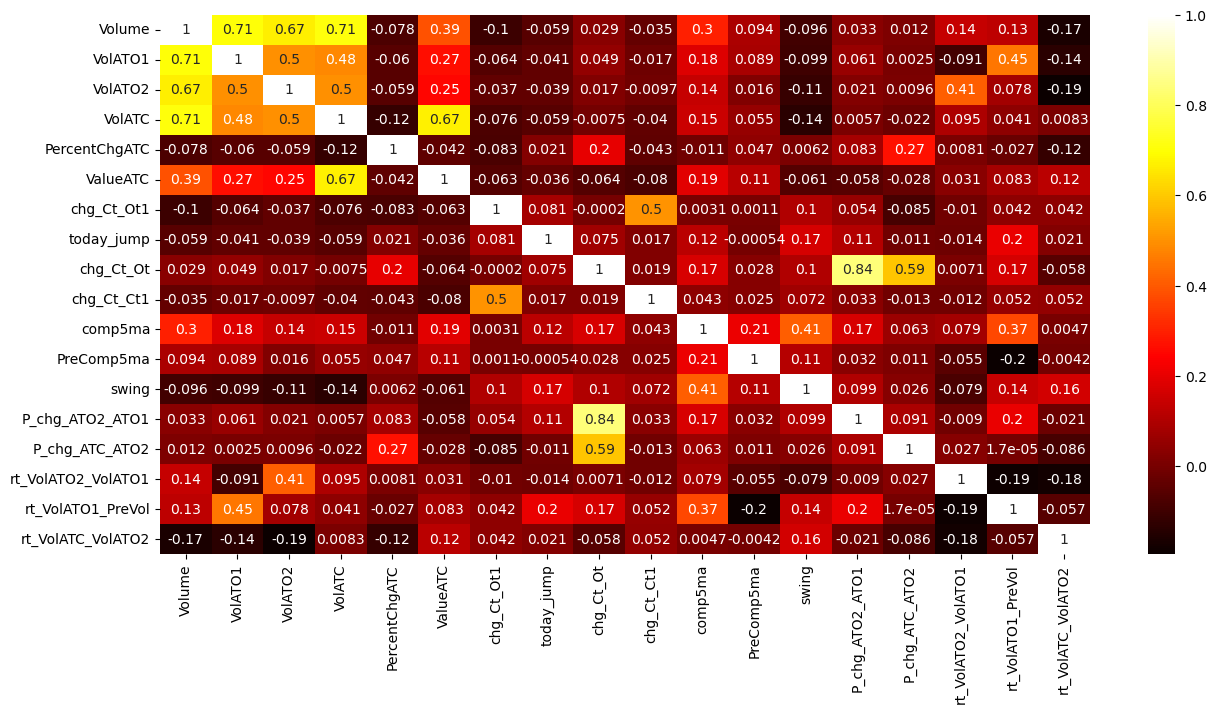

In [99]:
# Correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.heatmap(clean_stacked.corr(),annot=True,cmap='hot')

#### However, when I looked at the correlation heatmap, I found a strong positive correlation (0.84) between `P_chg_ATO2_ATO1` and `chg_Ct_Ot`. This means that if the afternoon opening price increases from the morning opening price, the closing price will also increase from the morning opening price.

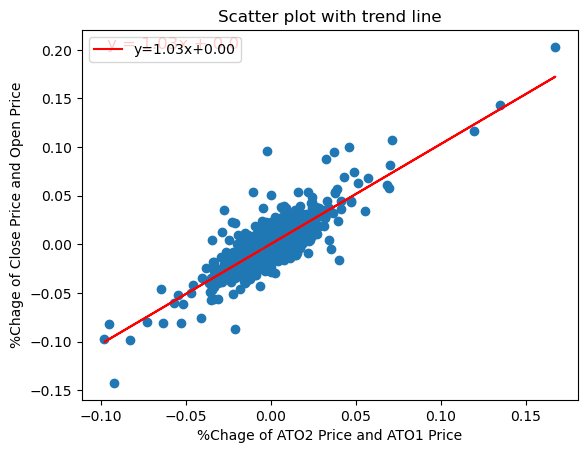

In [100]:
import numpy as np
from scipy import stats

# Create a scatter plot
plt.scatter(clean_stacked['P_chg_ATO2_ATO1'], clean_stacked['chg_Ct_Ot'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_stacked['P_chg_ATO2_ATO1'], clean_stacked['chg_Ct_Ot'])

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add trend line
plt.plot(clean_stacked['P_chg_ATO2_ATO1'], intercept + slope*clean_stacked['P_chg_ATO2_ATO1'], 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Set the x and y axis labels
plt.xlabel('%Chage of ATO2 Price and ATO1 Price')
plt.ylabel('%Chage of Close Price and Open Price')

# Set the plot title and legend
plt.title('Scatter plot with trend line')
plt.legend()

# Add equation to the plot
plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='r')

# Show the plot
plt.show()


The linear equation is 
    
    y = 1.03x
    
    - where y represents the percentage change of today's closing price from today's morning opening price and 
    - x represents the percentage change of afternoon opening price from today's morning opening price.

Example:

- If we know that the afternoon opening price has increased by 2% from the morning opening price.
- Then, y = 1.03 x 2% = 2.06%, meaning the closing price may increase by 2.26% from the morning opening price.
- Now that the afternoon opening price has already risen by 2%, we can expect a remaining probability of 0.06% for the closing price to be higher than the afternoon opening price.
- Therefore, we can buy ATO2 and sell ATC to expect a profit of 0.06%.    

In [101]:
# Find RMSE and R-squared

Predict = clean_stacked['P_chg_ATO2_ATO1']*1.03
Real = clean_stacked['chg_Ct_Ot']

# Calculate

from sklearn.metrics import r2_score
rmse = mean_squared_error(Real, Predict, squared=False).round(4)
r_squared = r2_score(Real, Predict).round(4)

print(f"RMSE : {rmse}")
print(f"R-squared : {r_squared}")

RMSE : 0.0097
R-squared : 0.705


In [102]:
# Calculate the variance
diff = (Predict-Real)*100
mean = round(np.mean(diff),4)
variance = round(np.var(diff),4)

print("Mean of Predict diff from Real:", mean)
print("Variance of Predict diff from Real:", variance)


Mean of Predict diff from Real: -0.025
Variance of Predict diff from Real: 0.9465


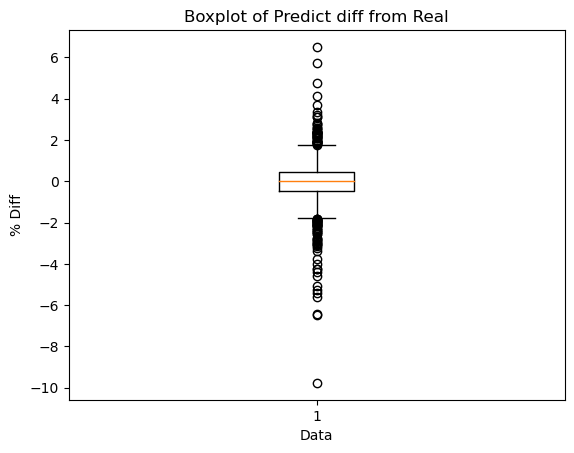

In [103]:
# PLot boxplot

import matplotlib.pyplot as plt

# plot the boxplot
plt.boxplot(diff)

# add labels and title
plt.xlabel('Data')
plt.ylabel('% Diff')
plt.title('Boxplot of Predict diff from Real')

# display the plot
plt.show()

# Next

Now we will be focus only 2 paraemter `P_chg_ATO2_ATO1` and `chg_Ct_Ot`. 

In [104]:
clean_stacked.head()

,Volume,Symbol,VolATO1,VolATO2,VolATC,PercentChgATC,ValueATC,chg_Ct_Ot1,today_jump,chg_Ct_Ot,chg_Ct_Ct1,comp5ma,PreComp5ma,swing,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,rt_VolATO2_VolATO1,rt_VolATO1_PreVol,rt_VolATC_VolATO2
5,4578400,DELTA,68500.0,15100.0,288600.0,0.55,210678000.0,0.0137,0.0275,-0.0214,0.0466,0.9872,2.1589,0.0912,-0.0027,-0.0188,0.2204,0.0082,19.1126
8,2553000,DELTA,18800.0,24400.0,500.0,0.53,382000.0,-0.0104,-0.0027,0.0378,-0.0312,0.6160,0.4331,0.0488,0.0243,0.0079,1.2979,0.0087,0.0205
9,1959800,DELTA,40200.0,6100.0,109700.0,-0.53,81616800.0,0.0242,-0.0104,-0.0211,0.0215,0.6855,0.6160,0.0430,-0.0053,-0.0159,0.1517,0.0157,17.9836
10,1560900,DELTA,38600.0,16100.0,123300.0,0.00,93708000.0,-0.0053,0.0242,-0.0026,-0.1421,0.6921,0.6855,0.0293,0.0079,-0.0104,0.4171,0.0197,7.6584
16,2686800,DELTA,69600.0,15000.0,213000.0,0.00,118428000.0,-0.0072,0.0071,-0.0246,-0.1043,0.5568,0.9726,0.0325,-0.0175,-0.0071,0.2155,0.0141,14.2000


### Idea : Can we make a profit with "Buy today afternoon open price then Sold today closing price" by focus on today closing price change from today morning open price 

Select parameter
- `Volume` : Today trading volumn = Yes, we can use real time trading volume instead
- `Symbol` : Stock symbol = **No, we don't**
- `VolATO1` : Today Morning Opening volumn = Yes, we can know  
- `VolATO2` : Afternoon Opening volumn = Yes, we can know
- `VolATC` : At the close volumn = **No, we can't** 
- `PercentChgATC` : Percent Change of ATC price from 16:30PM price = **No, we can't**
- `ValueATC` : Value of ATC = **No, we can't** 
- `chg_Ct_Ot1` : Percent change between today closing price and tomorow opening price = **No, we can't**
- `chg_Ct_Ot` : Percent change between today closing price and today opening price = This is **Target**
- `chg_Ct_Ct1` : Percent change between today closing price and tomorow closing price = **No, we can't**
- `today_jump` : Percent change between today morning opening price and yesterday closing price = Yes, we can know
- `comp5ma` : Ratio of today volumn and average 5 day volumn = Yes, we can use real time trading volume instead
- `PreComp5ma` : Ratio of previous volumn and average 5 day volumn = Yes, we can know
- `swing` : Percent swing of daily swing (high - low)/low = **No, we can't**
- `rt_VolATO1_PreVol` : Ratio of today opening volmn in the morning and previos day volumn = Yes, we can know
- `P_chg_ATO2_ATO1` : Percent change between Afternoon price from Morning price = Yes, we can know
- `rt_VolATO2_VolATO1` : Ratio of Afternoon opening volumn and Morning opening volumn = Yes, we can know
- `rt_VolATC_VolATO2` : Ratio of Closing volumn and Afternoon opening volumn  = **No, we can't**
- `P_chg_ATC_ATO2` : Percent change between Closing price and Afternoon opening price = **No, we can't**

In [105]:
# X = feature variables, y = a target variable

X = clean_stacked[['Volume','VolATO1','VolATO2','today_jump','comp5ma','PreComp5ma',
                   'rt_VolATO1_PreVol','P_chg_ATO2_ATO1','rt_VolATO2_VolATO1']]
y = clean_stacked['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(1827, 9)
(1827,)


In [106]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1461, 9)
y_train: (1461,)
X_test:  (366, 9)
y_test:  (366,)


In [107]:
# Model fitting

# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
enet_model = ElasticNet(alpha = 0.01)
enet_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.42119e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


ElasticNet(alpha=0.01)

In [108]:
# Model evaluation

# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")

# Lasso Regression
pred_lasso_test = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, pred_lasso_test, squared=False).round(4)
test_r2_lasso = lasso_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Lasso model : {rmse_lasso}")
print(f"R-squared from Lasso model : {test_r2_lasso}")

# ElasticNet Regression
pred_enet_test = enet_model.predict(X_test)
rmse_enet = mean_squared_error(y_test, pred_enet_test, squared=False).round(4)
test_r2_enet = enet_model.score(X_test, y_test).round(4)
print(f"\nRMSE from ElasticNet model : {rmse_enet}")
print(f"R-squared from ElasticNet model : {test_r2_enet}")

RMSE from Linear model : 0.01
R-squared from Linear model : 0.6562

RMSE from Logistic model : 0.01
R-squared from Logistic model : 0.6562

RMSE from Ridge model : 0.01
R-squared from Ridge model : 0.6564

RMSE from Lasso model : 0.0171
R-squared from Lasso model : 0.0003

RMSE from ElasticNet model : 0.0171
R-squared from ElasticNet model : 0.0003


#### It looking good in R-squared of Linear, Logistic and Ridge model. Now I will try select only the day that had **`P_chg_ATO2_ATO1` >= 0** cause we need take action on rising price day. 

In [109]:
up_data = clean_stacked[clean_stacked['P_chg_ATO2_ATO1'] >= 0]
up_data.head()

,Volume,Symbol,VolATO1,VolATO2,VolATC,PercentChgATC,ValueATC,chg_Ct_Ot1,today_jump,chg_Ct_Ot,chg_Ct_Ct1,comp5ma,PreComp5ma,swing,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,rt_VolATO2_VolATO1,rt_VolATO1_PreVol,rt_VolATC_VolATO2
8,2553000,DELTA,18800.0,24400.0,500.0,0.53,382000.0,-0.0104,-0.0027,0.0378,-0.0312,0.6160,0.4331,0.0488,0.0243,0.0079,1.2979,0.0087,0.0205
10,1560900,DELTA,38600.0,16100.0,123300.0,0.00,93708000.0,-0.0053,0.0242,-0.0026,-0.1421,0.6921,0.6855,0.0293,0.0079,-0.0104,0.4171,0.0197,7.6584
27,2192200,DELTA,33900.0,5800.0,146400.0,-0.43,68515200.0,-0.0043,-0.0085,0.0043,0.0000,0.8004,1.1419,0.0435,0.0086,-0.0043,0.1711,0.0104,25.2414
28,2192200,DELTA,33900.0,5800.0,146400.0,-0.43,68515200.0,-0.0043,-0.0043,0.0043,0.0000,0.8004,0.8004,0.0435,0.0086,-0.0043,0.1711,0.0155,25.2414
29,2192200,DELTA,33900.0,5800.0,146400.0,-0.43,68515200.0,0.0043,-0.0043,0.0043,-0.0171,0.8004,0.8004,0.0435,0.0086,-0.0043,0.1711,0.0155,25.2414


## Repeat ML

In [110]:
# X = feature variables, y = a target variable

X = up_data[['Volume','VolATO1','VolATO2','today_jump','comp5ma','PreComp5ma',
                   'rt_VolATO1_PreVol','P_chg_ATO2_ATO1','rt_VolATO2_VolATO1']]
y = up_data['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(1020, 9)
(1020,)


In [111]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (816, 9)
y_train: (816,)
X_test:  (204, 9)
y_test:  (204,)


In [112]:
# Model fitting

# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)

# Logistic regression
logis_model = LinearRegression()
logis_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.4598e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.01)

In [113]:
# Model evaluation

# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")

# Logistic regression
pred_logis_test = logis_model.predict(X_test)
rmse_logis = mean_squared_error(y_test, pred_logis_test, squared=False).round(4)
test_r2_logis = logis_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Logistic model : {rmse_logis}")
print(f"R-squared from Logistic model : {test_r2_logis}")

# Ridge Regression
pred_ridge_test = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge_test, squared=False).round(4)
test_r2_ridge = ridge_model.score(X_test, y_test).round(4)
print(f"\nRMSE from Ridge model : {rmse_ridge}")
print(f"R-squared from Ridge model : {test_r2_ridge}")



RMSE from Linear model : 0.0088
R-squared from Linear model : 0.7726

RMSE from Logistic model : 0.0088
R-squared from Logistic model : 0.7726

RMSE from Ridge model : 0.0094
R-squared from Ridge model : 0.7433


#### R-squared improve from 0.6562 to 0.7726 on Linear model

In [114]:
# Check variable importance 

# create a DataFrame to store the feature coefficients and absolute values
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': abs(li_model.coef_)})

# sort the coefficients by absolute value
coef_df = coef_df.sort_values('Coefficient', ascending=False)

# print the sorted coefficients
print(coef_df)

              Feature   Coefficient
7     P_chg_ATO2_ATO1  9.769795e-01
3          today_jump  8.161079e-02
6   rt_VolATO1_PreVol  5.987170e-02
4             comp5ma  3.444431e-03
5          PreComp5ma  1.331469e-03
8  rt_VolATO2_VolATO1  2.379025e-04
1             VolATO1  9.775532e-10
2             VolATO2  9.248591e-11
0              Volume  2.653082e-11


Let's improve my select top 3 variable importance are `P_chg_ATO2_ATO1`, `today_jump` and `rt_VolATO1_PreVol`

In [115]:
# Select variable importance 

new1_updata = up_data[['P_chg_ATO2_ATO1','today_jump','rt_VolATO1_PreVol','chg_Ct_Ot']]
new1_updata.head()

,P_chg_ATO2_ATO1,today_jump,rt_VolATO1_PreVol,chg_Ct_Ot
8,0.0243,-0.0027,0.0087,0.0378
10,0.0079,0.0242,0.0197,-0.0026
27,0.0086,-0.0085,0.0104,0.0043
28,0.0086,-0.0043,0.0155,0.0043
29,0.0086,-0.0043,0.0155,0.0043


In [116]:
# X = feature variables, y = a target variable

X = new1_updata.drop('chg_Ct_Ot',axis=1)
y = new1_updata['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(1020, 3)
(1020,)


In [117]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (816, 3)
y_train: (816,)
X_test:  (204, 3)
y_test:  (204,)


In [118]:
# Model fitting (I slect the simple model with high R-squared)

# Linear regression
li1_model = LinearRegression()
li1_model.fit(X_train, y_train)


LinearRegression()

In [119]:
# Model evaluation

# Linear regression
pred_li_test = li1_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li1_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")


RMSE from Linear model : 0.0086
R-squared from Linear model : 0.7869


#### R-squared little improve from  0.7726 to 0.7869 on Linear model

In [137]:
# Select variable importance again

new2_updata = up_data[['P_chg_ATO2_ATO1','today_jump','chg_Ct_Ot']]
new2_updata.head()

,P_chg_ATO2_ATO1,today_jump,chg_Ct_Ot
8,0.0243,-0.0027,0.0378
10,0.0079,0.0242,-0.0026
27,0.0086,-0.0085,0.0043
28,0.0086,-0.0043,0.0043
29,0.0086,-0.0043,0.0043


In [138]:
# X = feature variables, y = a target variable

X = new2_updata.drop('chg_Ct_Ot',axis=1)
y = new2_updata['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(1020, 2)
(1020,)


In [139]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (816, 2)
y_train: (816,)
X_test:  (204, 2)
y_test:  (204,)


In [140]:
# Model fitting (I slect the simple model with high R-squared)

# Linear regression
li2_model = LinearRegression()
li2_model.fit(X_train, y_train)


LinearRegression()

In [141]:
# Model evaluation

# Linear regression
pred_li_test = li2_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li2_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")


RMSE from Linear model : 0.0083
R-squared from Linear model : 0.7981


#### R-squared little improve from 0.7869 to 0.7981 on Linear model

In [125]:
# Select variable importance again

new3_updata = up_data[['P_chg_ATO2_ATO1','today_jump','comp5ma','rt_VolATO1_PreVol','chg_Ct_Ot']]
new3_updata.head()

,P_chg_ATO2_ATO1,today_jump,comp5ma,rt_VolATO1_PreVol,chg_Ct_Ot
8,0.0243,-0.0027,0.6160,0.0087,0.0378
10,0.0079,0.0242,0.6921,0.0197,-0.0026
27,0.0086,-0.0085,0.8004,0.0104,0.0043
28,0.0086,-0.0043,0.8004,0.0155,0.0043
29,0.0086,-0.0043,0.8004,0.0155,0.0043


In [126]:
# X = feature variables, y = a target variable

X = new3_updata.drop('chg_Ct_Ot',axis=1)
y = new3_updata['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(1020, 4)
(1020,)


In [127]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (816, 4)
y_train: (816,)
X_test:  (204, 4)
y_test:  (204,)


In [128]:
# Model fitting (I slect the simple model with high R-squared)

# Linear regression
li3_model = LinearRegression()
li3_model.fit(X_train, y_train)


LinearRegression()

In [129]:
# Model evaluation

# Linear regression
pred_li_test = li3_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li3_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")


RMSE from Linear model : 0.0086
R-squared from Linear model : 0.783


#### R-squared little reduce from 0.7981 to 0.783 on Linear model

In [130]:
# Select variable importance again

new4_updata = up_data[['P_chg_ATO2_ATO1','chg_Ct_Ot']]
new4_updata.head()

,P_chg_ATO2_ATO1,chg_Ct_Ot
8,0.0243,0.0378
10,0.0079,-0.0026
27,0.0086,0.0043
28,0.0086,0.0043
29,0.0086,0.0043


In [131]:
# X = feature variables, y = a target variable

X = new4_updata.drop('chg_Ct_Ot',axis=1)
y = new4_updata['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(1020, 1)
(1020,)


In [132]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (816, 1)
y_train: (816,)
X_test:  (204, 1)
y_test:  (204,)


In [133]:
# Model fitting (I slect the simple model with high R-squared)

# Linear regression
li4_model = LinearRegression()
li4_model.fit(X_train, y_train)


LinearRegression()

In [134]:
# Model evaluation

# Linear regression
pred_li_test = li4_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li4_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")


RMSE from Linear model : 0.0084
R-squared from Linear model : 0.7931


#### R-squared improve reduce from 0.783 to 0.7931 on Linear model

Now the highest R-squared is 0.7981 that include `P_chg_ATO2_ATO1` and `today_jump` features . Second R-squared is 0.7931 that only `P_chg_ATO2_ATO1` features.

In [142]:
# Check coefficients

# create a DataFrame to store the feature coefficients and absolute values
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': abs(li2_model.coef_)})

# sort the coefficients by absolute value
coef_df = coef_df.sort_values('Coefficient', ascending=False)

# print the sorted coefficients
print(coef_df)

           Feature  Coefficient
0  P_chg_ATO2_ATO1     1.012133
1       today_jump     0.068486


In [144]:
# get the coefficients of the fitted model
b0 = li2_model.intercept_
b1, b2 = li2_model.coef_

# print the equation of the fitted model
print(f'2 feature linear equation y = {b0:.4f} + {b1:.4f} * "P_chg_ATO2_ATO1" + {b2:.4f} * "today_jump "')

2 feature linear equation y = -0.0003 + 1.0121 * "P_chg_ATO2_ATO1" + 0.0685 * "today_jump "


#### I want to try analysis `P_chg_ATO2_ATO1` >=0 and `today_jump` >= 0

In [145]:
both_jump = new2_updata[new2_updata['today_jump'] >= 0]
both_jump.head()

,P_chg_ATO2_ATO1,today_jump,chg_Ct_Ot
10,0.0079,0.0242,-0.0026
34,0.0000,0.0000,0.0000
35,0.0000,0.0000,0.0000
40,0.0133,0.0000,0.0000
41,0.0133,0.0000,0.0000


In [146]:
# X = feature variables, y = a target variable

X = both_jump.drop('chg_Ct_Ot',axis=1)
y = both_jump['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(691, 2)
(691,)


In [147]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (552, 2)
y_train: (552,)
X_test:  (139, 2)
y_test:  (139,)


In [148]:
# Model fitting (I slect the simple model with high R-squared)

# Linear regression
li5_model = LinearRegression()
li5_model.fit(X_train, y_train)


LinearRegression()

In [149]:
# Model evaluation

# Linear regression
pred_li_test = li5_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li5_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")


RMSE from Linear model : 0.0114
R-squared from Linear model : 0.6104


#### Not good, R-squared reducing

## So I will backtesting the strategy

Buy on ATO2 when
- Afternoon opening price >= Morning opening price (`P_chg_ATO2_ATO1` >= 0) and
- When we calculate y = -0.0003 + 1.0121 * `P_chg_ATO2_ATO1` + 0.0685 * `today_jump`
- Must  "y - `P_chg_ATO2_ATO1`" > comission (0.3%)

Sell on today ATC

In [151]:
# Create data for backest

import numpy as np

# replace Infinity values with NaN values
bt_data = stacked.replace([np.inf, -np.inf], np.nan)

# drop rows containing NaN values
bt_data = bt_data.dropna(axis=0, how='any')

bt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 5 to 403
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   open                1827 non-null   float64       
 1   high                1827 non-null   float64       
 2   low                 1827 non-null   float64       
 3   close               1827 non-null   float64       
 4   Volume              1827 non-null   int64         
 5   Volume MA           1827 non-null   float64       
 6   Date                1827 non-null   datetime64[ns]
 7   Symbol              1827 non-null   object        
 8   _id                 1827 non-null   float64       
 9   VolATO1             1827 non-null   float64       
 10  PriceATO1           1827 non-null   float64       
 11  Close(T_1)          1827 non-null   float64       
 12  VolATO2             1827 non-null   float64       
 13  PriceATO2           1827 non-null   float64      

In [152]:
# Select column

bt_select = bt_data[['Date','Symbol','PriceATO1','PriceATO2','PriceATC','chg_Ct_Ot','today_jump','P_chg_ATO2_ATO1','P_chg_ATC_ATO2']]
bt_select.head()

,Date,Symbol,PriceATO1,PriceATO2,PriceATC,chg_Ct_Ot,today_jump,P_chg_ATO2_ATO1,P_chg_ATC_ATO2
5,2021-09-03,DELTA,746.0,744.0,730.0,-0.0214,0.0275,-0.0027,-0.0188
8,2021-09-08,DELTA,740.0,758.0,764.0,0.0378,-0.0027,0.0243,0.0079
9,2021-09-09,DELTA,760.0,756.0,744.0,-0.0211,-0.0104,-0.0053,-0.0159
10,2021-09-10,DELTA,762.0,768.0,760.0,-0.0026,0.0242,0.0079,-0.0104
16,2021-09-20,DELTA,570.0,560.0,556.0,-0.0246,0.0071,-0.0175,-0.0071


In [153]:
# Create predict % change of ATC from ATO1

bt_select.loc[:, 'Pred_chg_Ct_Ot'] = -0.0003 + 1.0121 * bt_select['P_chg_ATO2_ATO1'] + 0.0685 * bt_select['today_jump']

bt_select.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8112\113055151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_select.loc[:, 'Pred_chg_Ct_Ot'] = -0.0003 + 1.0121 * bt_select['P_chg_ATO2_ATO1'] + 0.0685 * bt_select['today_jump']


,Date,Symbol,PriceATO1,PriceATO2,PriceATC,chg_Ct_Ot,today_jump,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,Pred_chg_Ct_Ot
5,2021-09-03,DELTA,746.0,744.0,730.0,-0.0214,0.0275,-0.0027,-0.0188,-0.001149
8,2021-09-08,DELTA,740.0,758.0,764.0,0.0378,-0.0027,0.0243,0.0079,0.024109
9,2021-09-09,DELTA,760.0,756.0,744.0,-0.0211,-0.0104,-0.0053,-0.0159,-0.006377
10,2021-09-10,DELTA,762.0,768.0,760.0,-0.0026,0.0242,0.0079,-0.0104,0.009353
16,2021-09-20,DELTA,570.0,560.0,556.0,-0.0246,0.0071,-0.0175,-0.0071,-0.017525


In [154]:
# Expect gain

bt_select.loc[:,'expect_gain'] = bt_select['Pred_chg_Ct_Ot'] - bt_select['P_chg_ATO2_ATO1']
bt_select.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8112\919909909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_select.loc[:,'expect_gain'] = bt_select['Pred_chg_Ct_Ot'] - bt_select['P_chg_ATO2_ATO1']


,Date,Symbol,PriceATO1,PriceATO2,PriceATC,chg_Ct_Ot,today_jump,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,Pred_chg_Ct_Ot,expect_gain
5,2021-09-03,DELTA,746.0,744.0,730.0,-0.0214,0.0275,-0.0027,-0.0188,-0.001149,0.001551
8,2021-09-08,DELTA,740.0,758.0,764.0,0.0378,-0.0027,0.0243,0.0079,0.024109,-0.000191
9,2021-09-09,DELTA,760.0,756.0,744.0,-0.0211,-0.0104,-0.0053,-0.0159,-0.006377,-0.001077
10,2021-09-10,DELTA,762.0,768.0,760.0,-0.0026,0.0242,0.0079,-0.0104,0.009353,0.001453
16,2021-09-20,DELTA,570.0,560.0,556.0,-0.0246,0.0071,-0.0175,-0.0071,-0.017525,-0.000025


In [155]:
# Create action ticker by 1 = action, 0 = not action

import numpy as np

bt_select['action'] = np.where((bt_select['P_chg_ATO2_ATO1'] >= 0) & (bt_select['expect_gain'] > 0.003), 1, 0)
bt_select.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8112\2210287048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_select['action'] = np.where((bt_select['P_chg_ATO2_ATO1'] >= 0) & (bt_select['expect_gain'] > 0.003), 1, 0)


,Date,Symbol,PriceATO1,PriceATO2,PriceATC,chg_Ct_Ot,today_jump,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,Pred_chg_Ct_Ot,expect_gain,action
5,2021-09-03,DELTA,746.0,744.0,730.0,-0.0214,0.0275,-0.0027,-0.0188,-0.001149,0.001551,0
8,2021-09-08,DELTA,740.0,758.0,764.0,0.0378,-0.0027,0.0243,0.0079,0.024109,-0.000191,0
9,2021-09-09,DELTA,760.0,756.0,744.0,-0.0211,-0.0104,-0.0053,-0.0159,-0.006377,-0.001077,0
10,2021-09-10,DELTA,762.0,768.0,760.0,-0.0026,0.0242,0.0079,-0.0104,0.009353,0.001453,0
16,2021-09-20,DELTA,570.0,560.0,556.0,-0.0246,0.0071,-0.0175,-0.0071,-0.017525,-0.000025,0


In [156]:
bt_select['action'].value_counts()

0    1822
1       5
Name: action, dtype: int64

In [157]:
# If we have 1 million bath to invest and invest 200,000 baht each stock (we have 5 stock univert)

profit = ((bt_select['P_chg_ATC_ATO2'][bt_select['action'] == 1]-0.003)*200000).sum()
print(f'Profit of this stratnegy is {profit} Baht')

Profit of this stratnegy is 460.0 Baht


## Conclusion

- Select the simple model with high R-squared is Linear regression model
- `expect_gain` = -0.0003 + 1.0121 * `P_chg_ATO2_ATO1` + 0.0685 * `today_jump`
- Profit of this stratnegy is 460.0 Baht
- Only 5 trades
- Feauture importance are `Date`,`Symbol`,`PriceATO1`,`PriceATO2`,`PriceATC`,`chg_Ct_Ot`,`today_jump`,`P_chg_ATO2_ATO1`,`P_chg_ATC_ATO2`

#### Next
- Add more stock data test. SET50, SET100, sSET and mai